# Velkommen til Python introduksjon

#### Importere data fra World Bank Data

Hente ut data via API og lager diagrammer befoldningsvekst for alle land i Afrika sammen, og individuelt for alle sammen. 

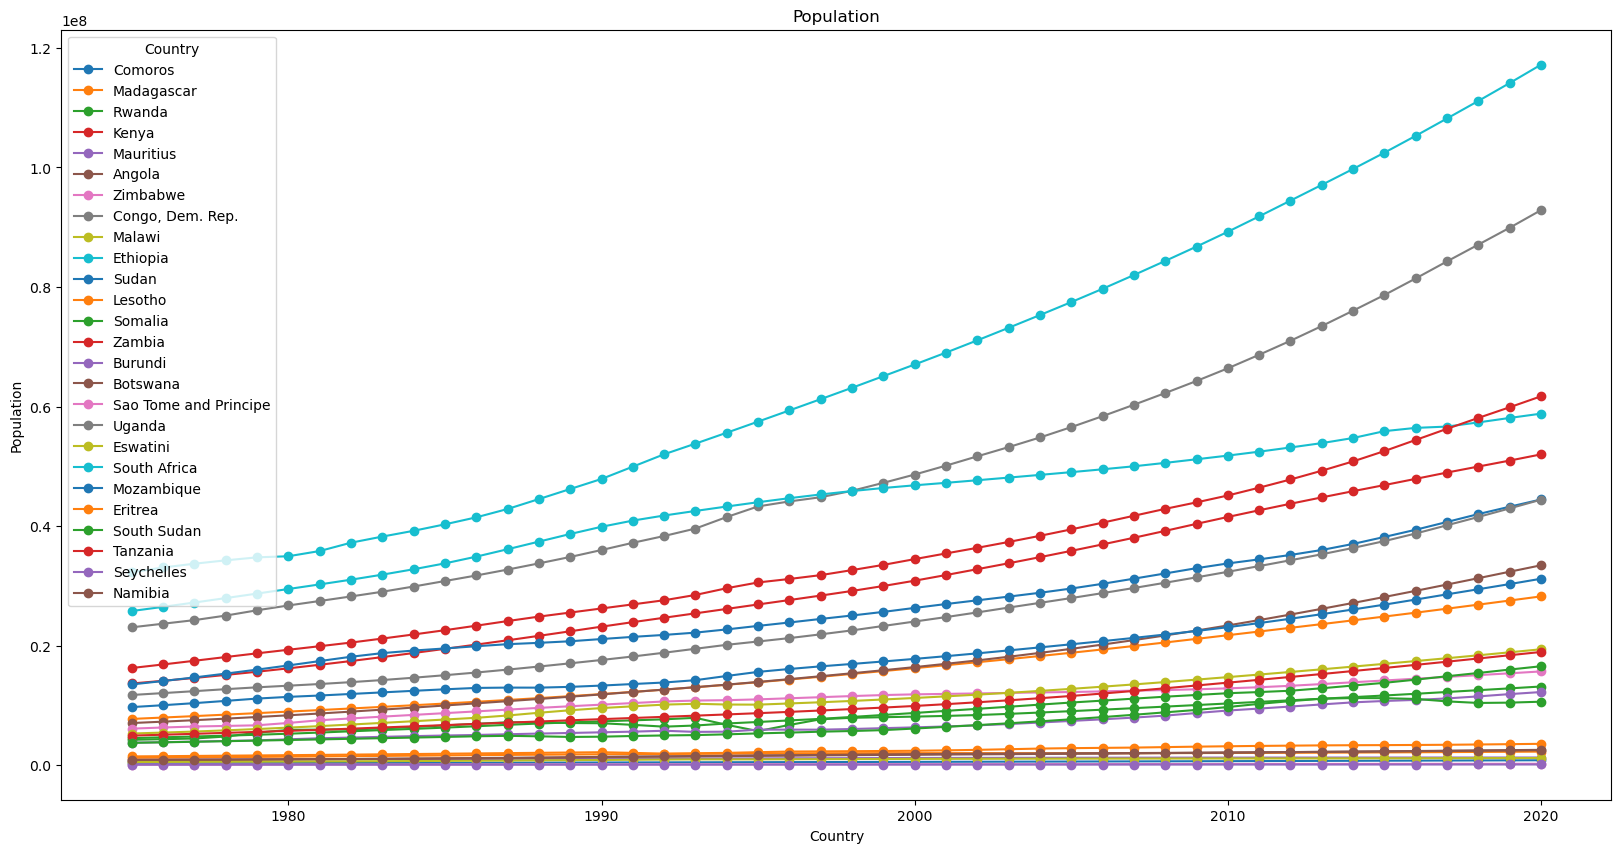

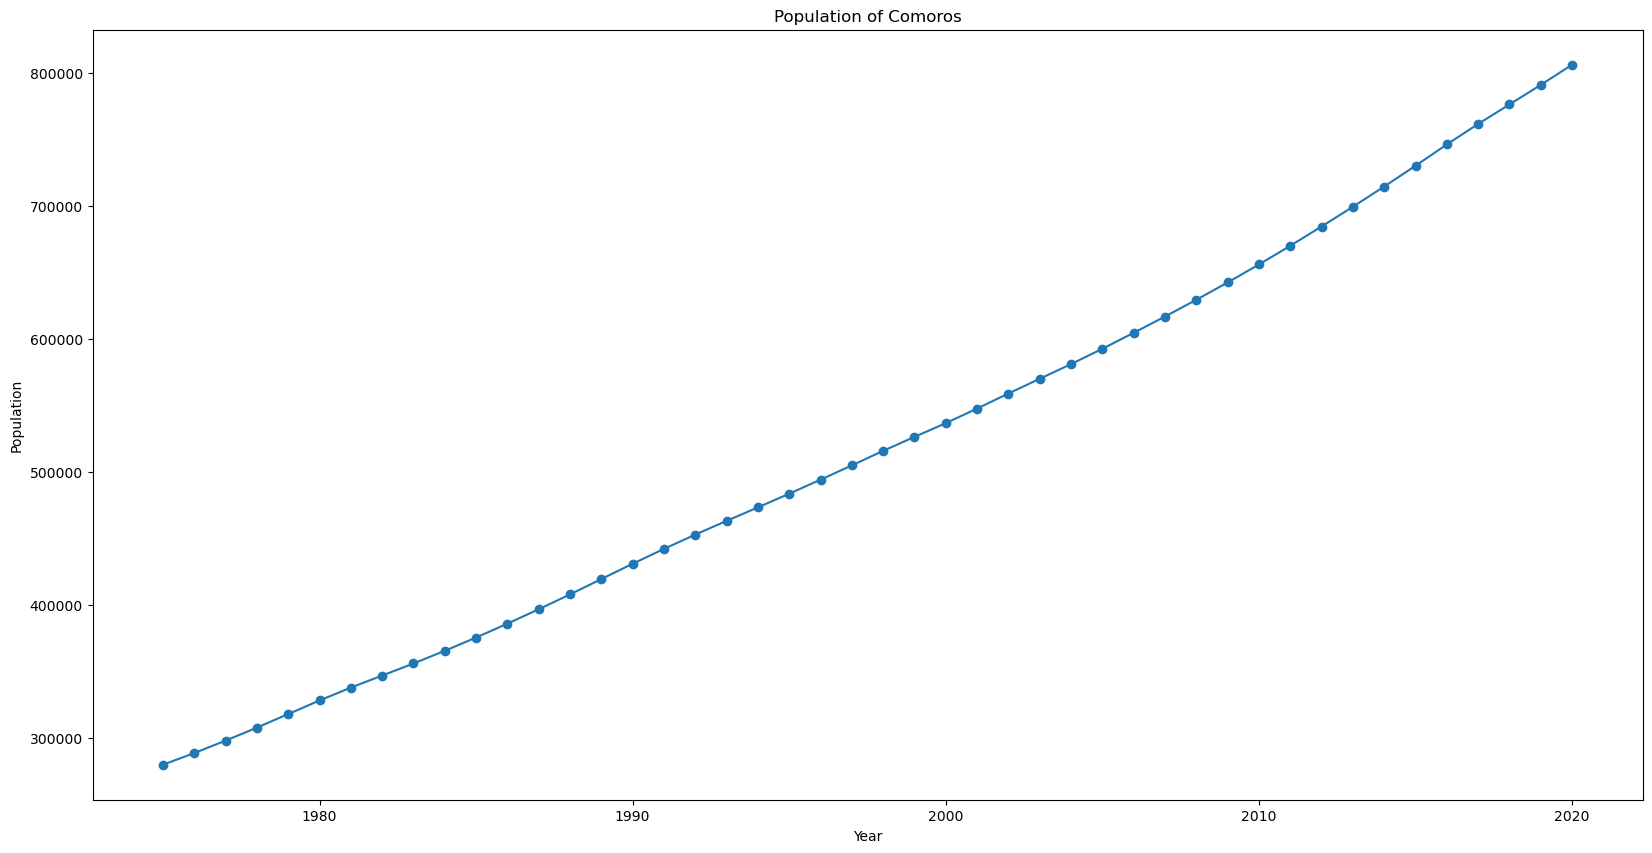

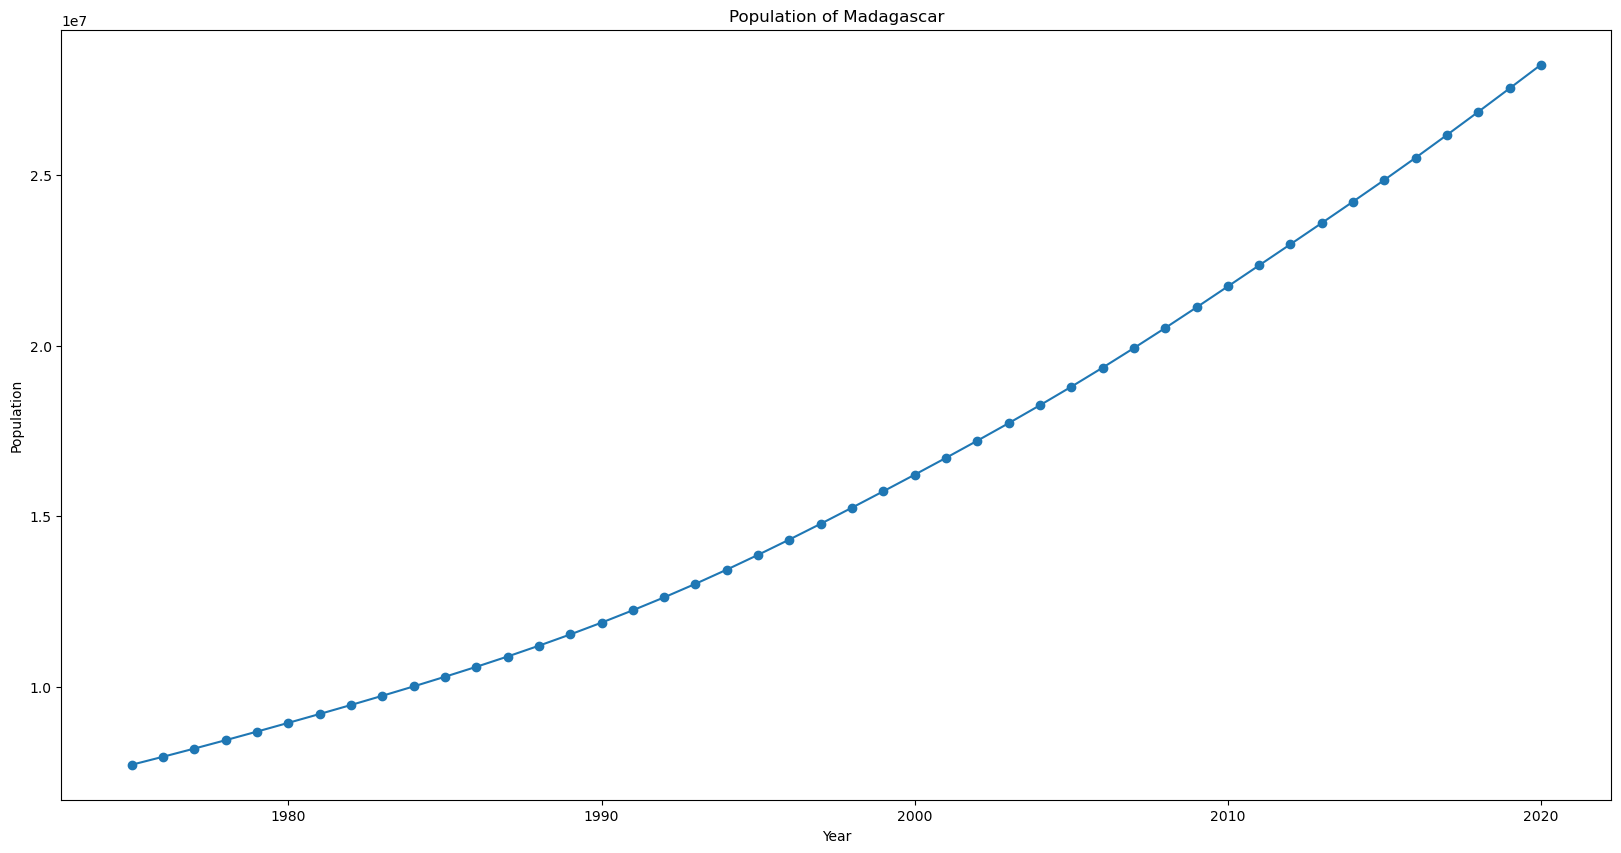

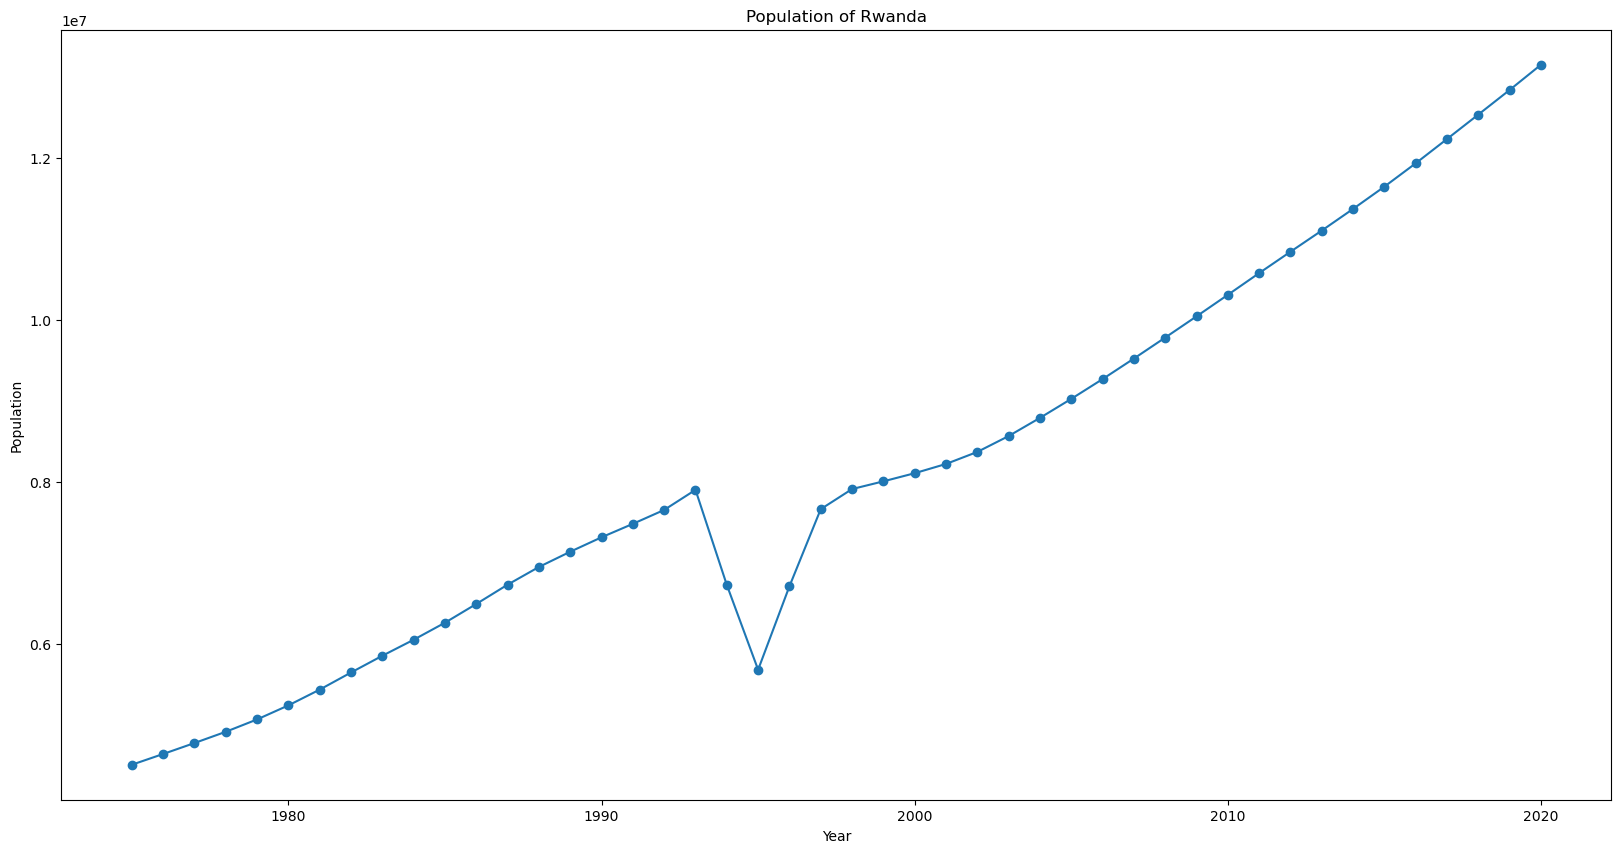

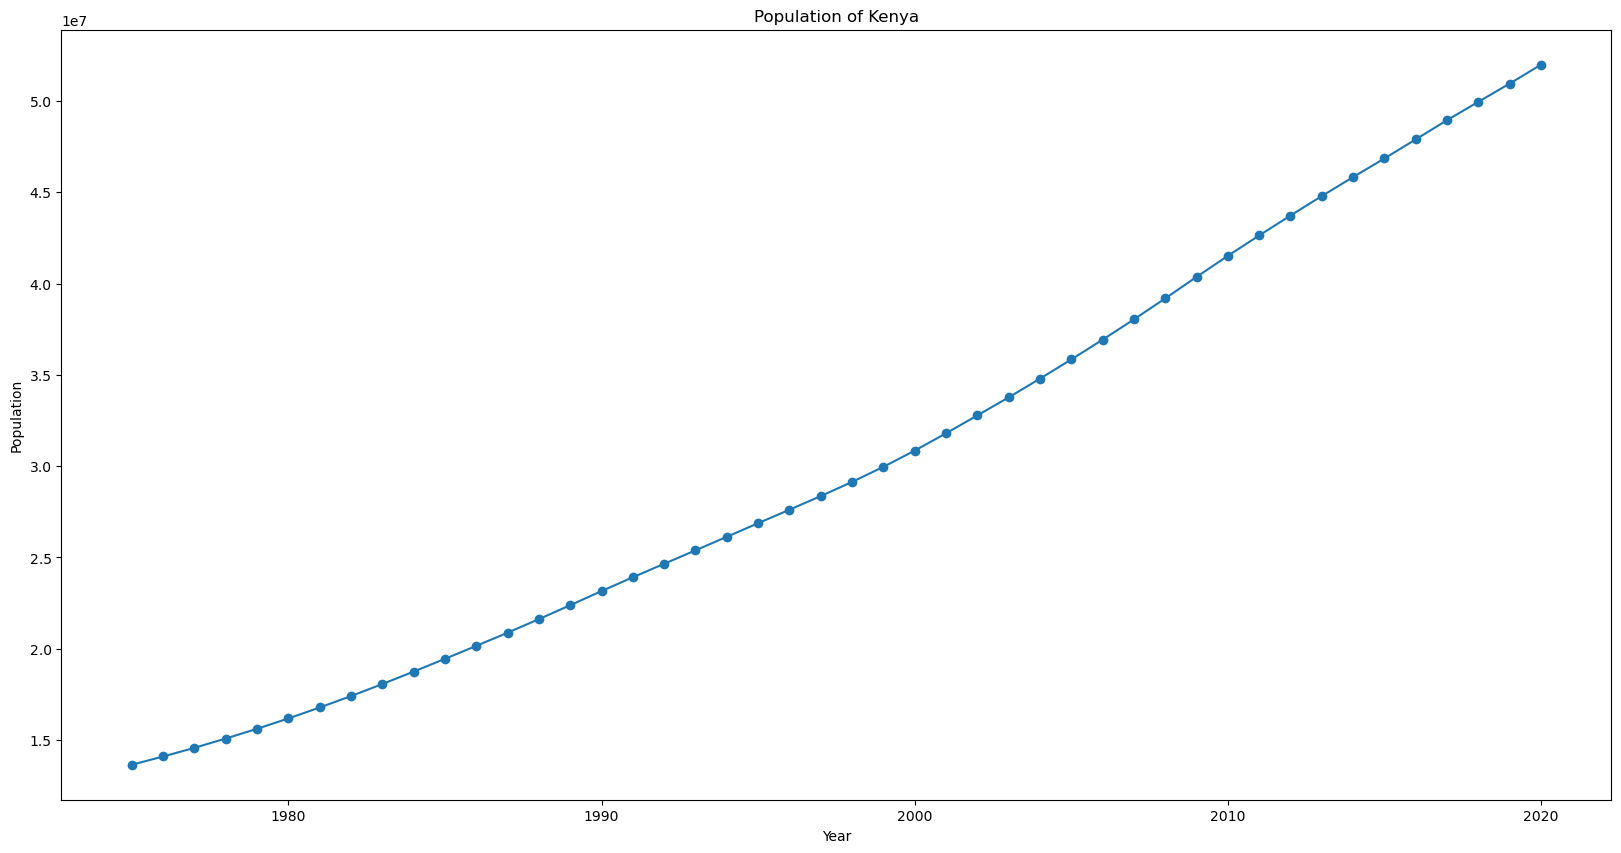

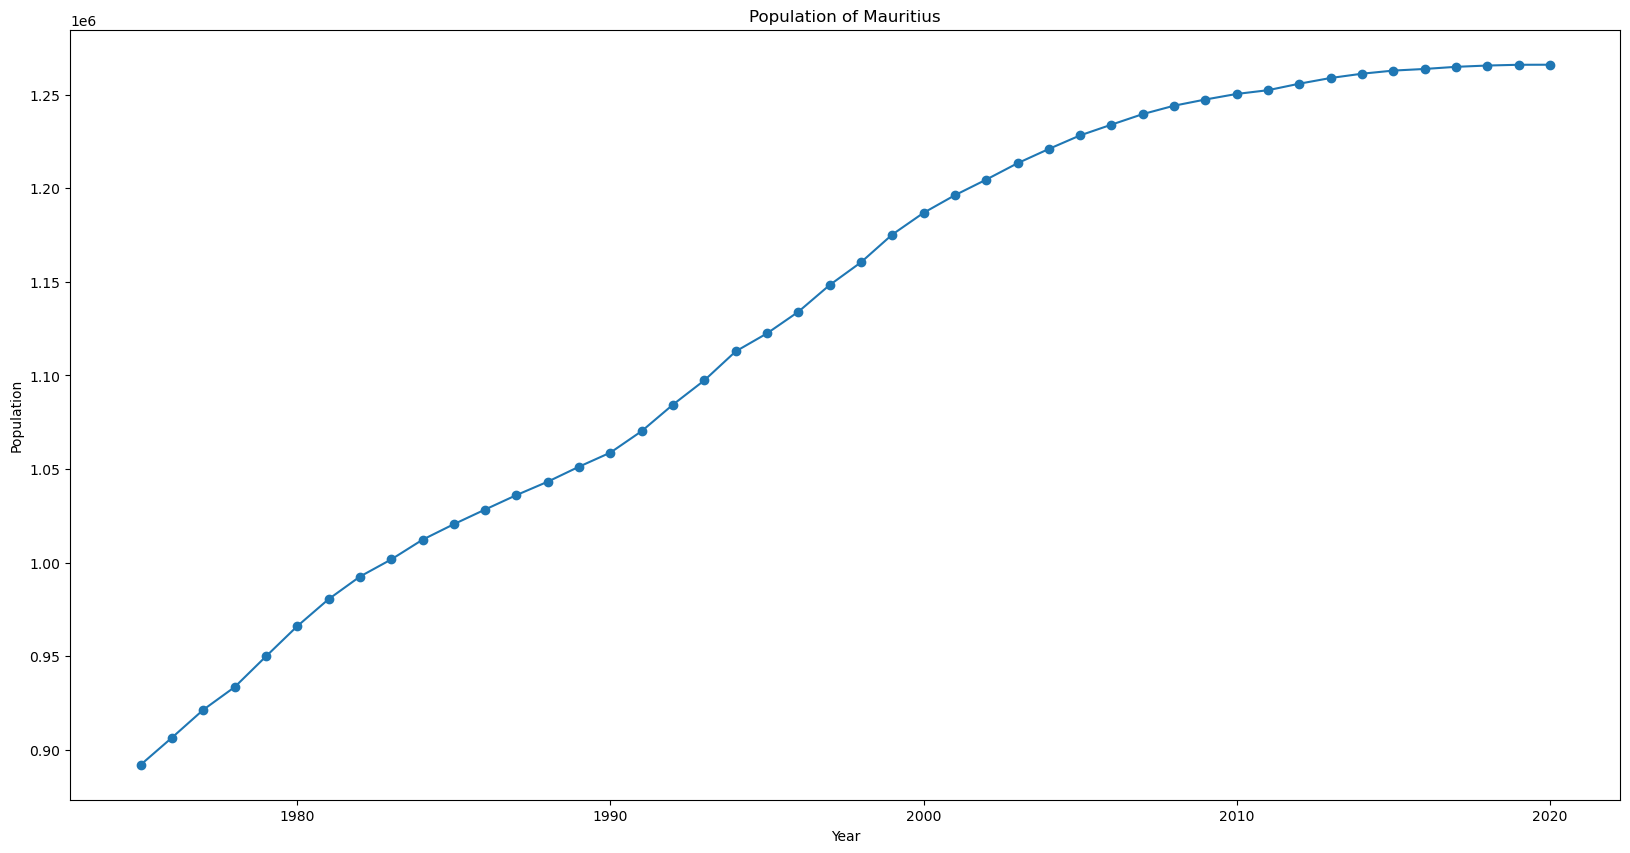

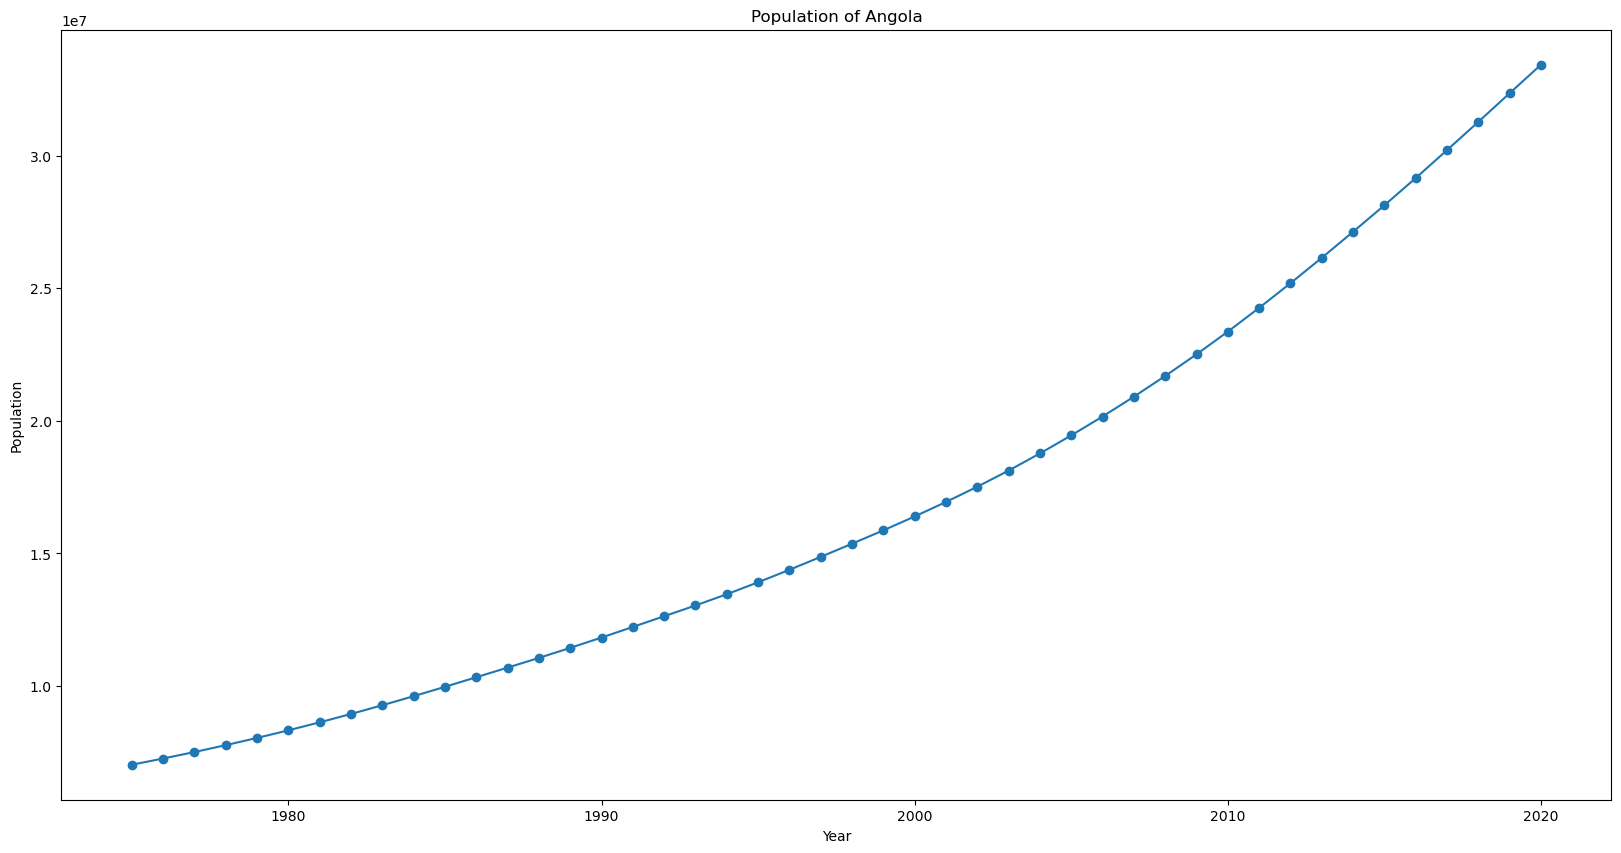

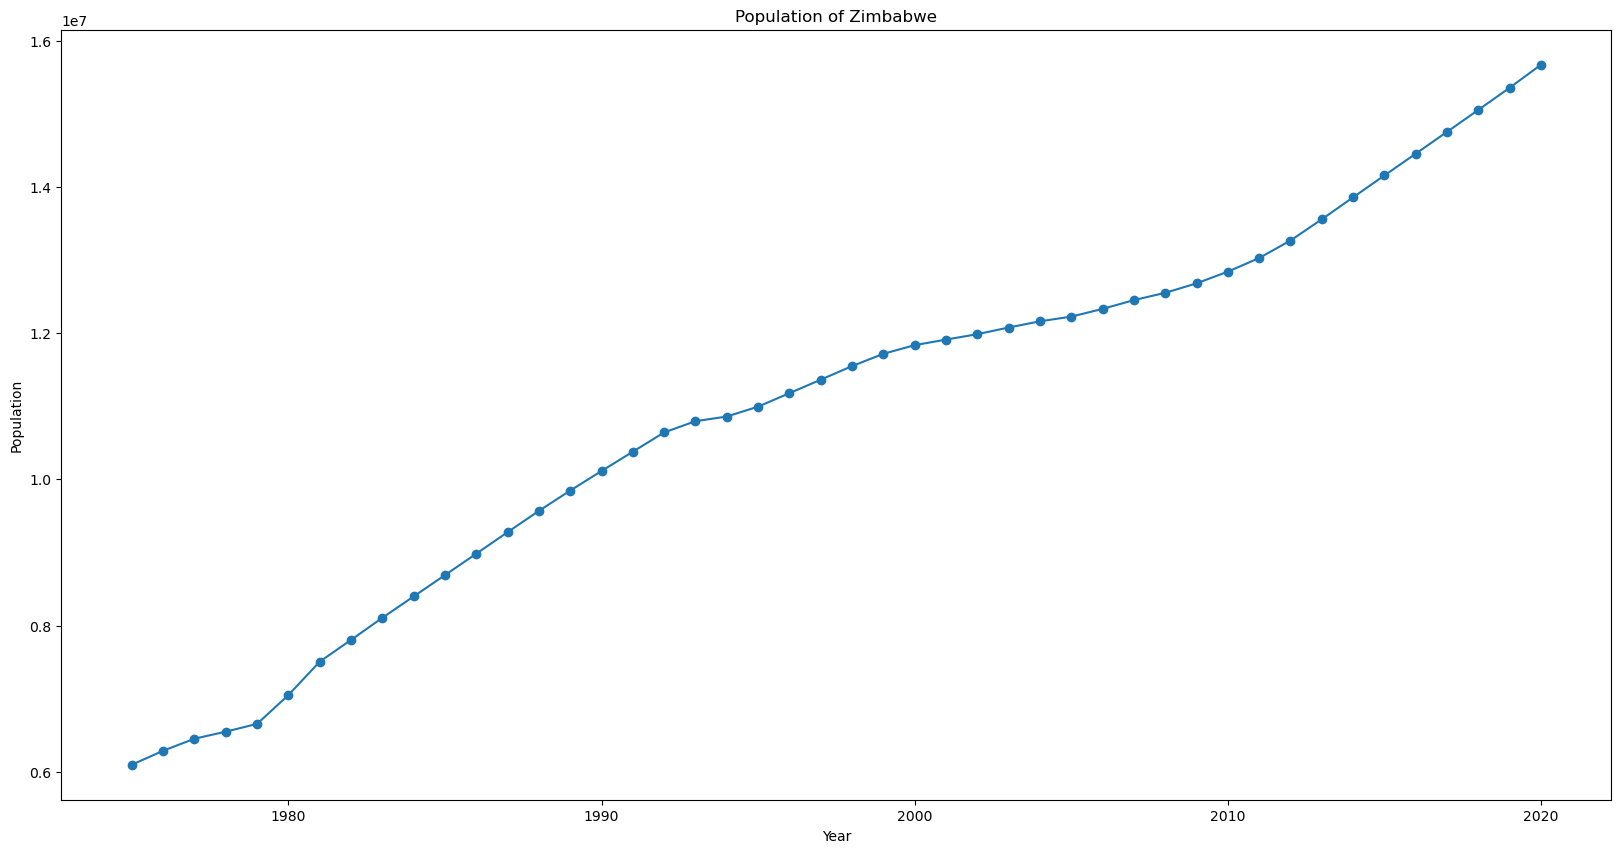

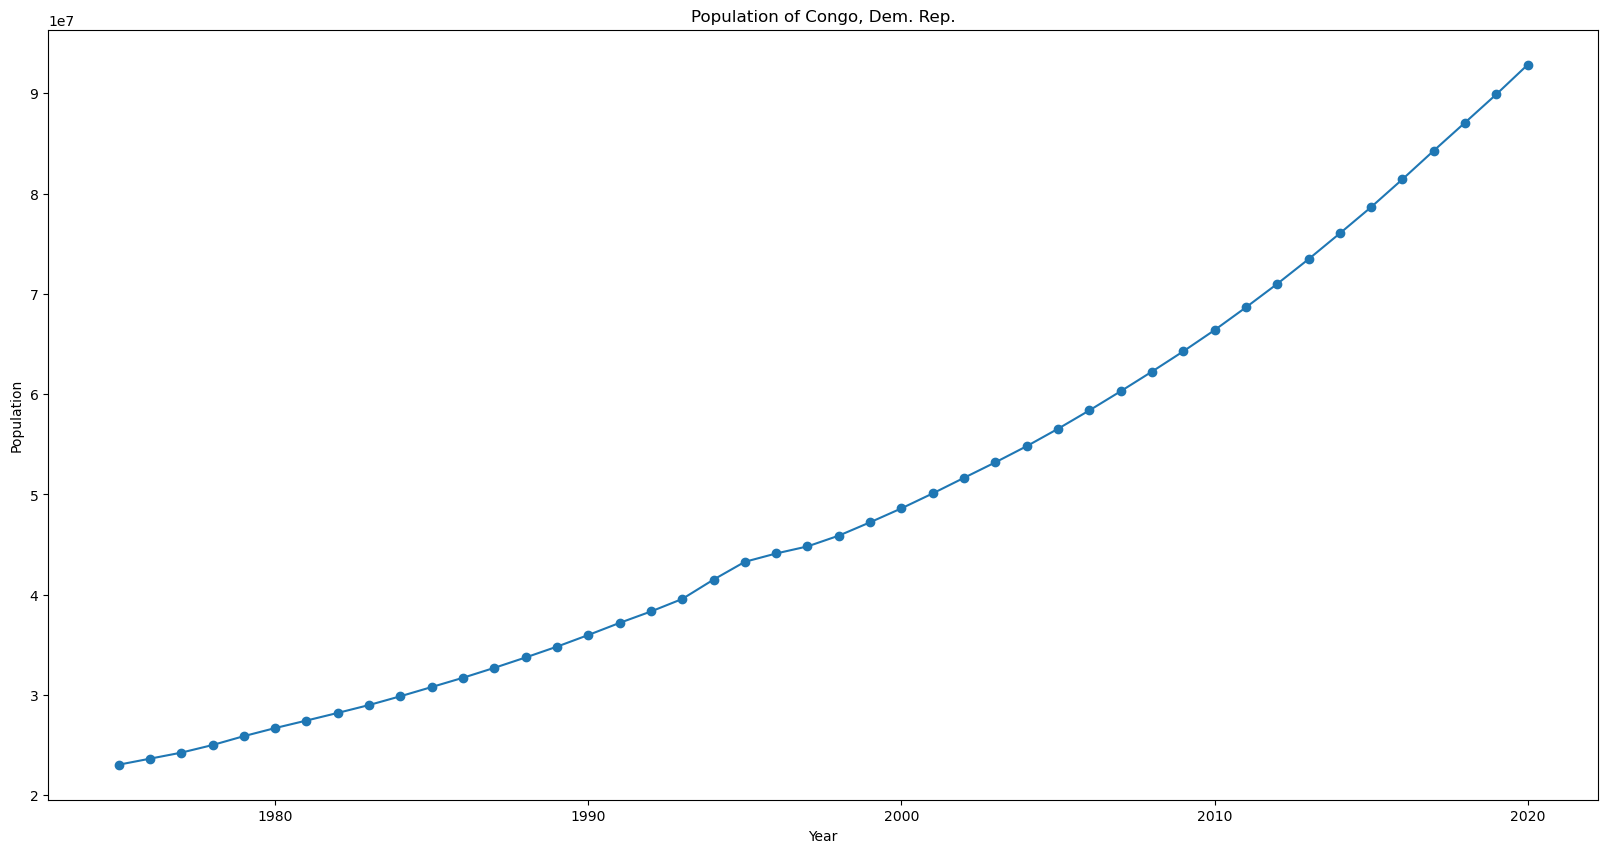

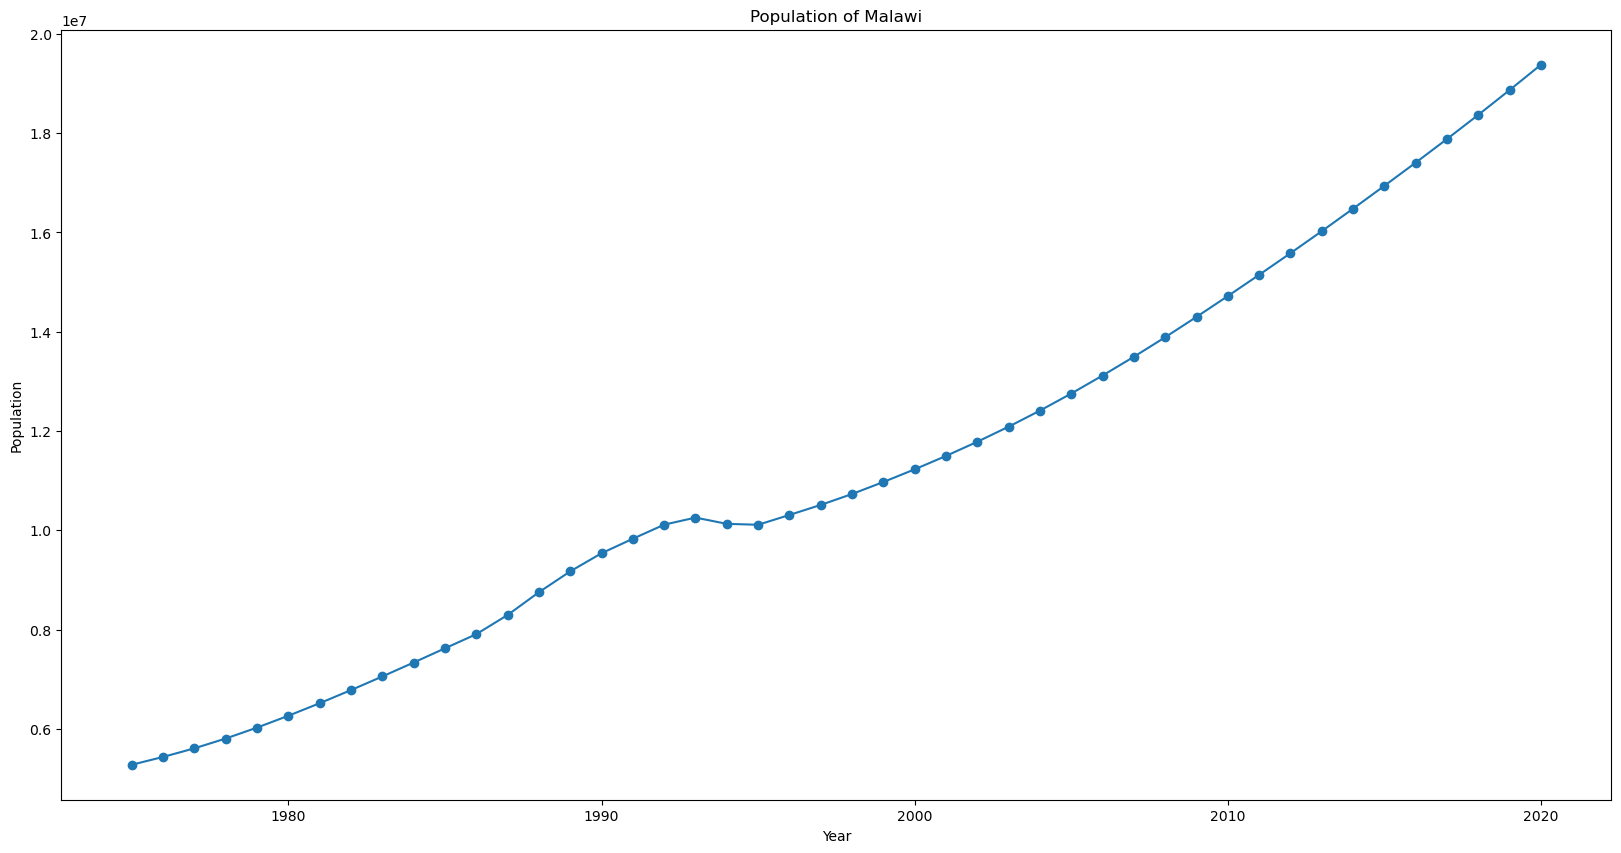

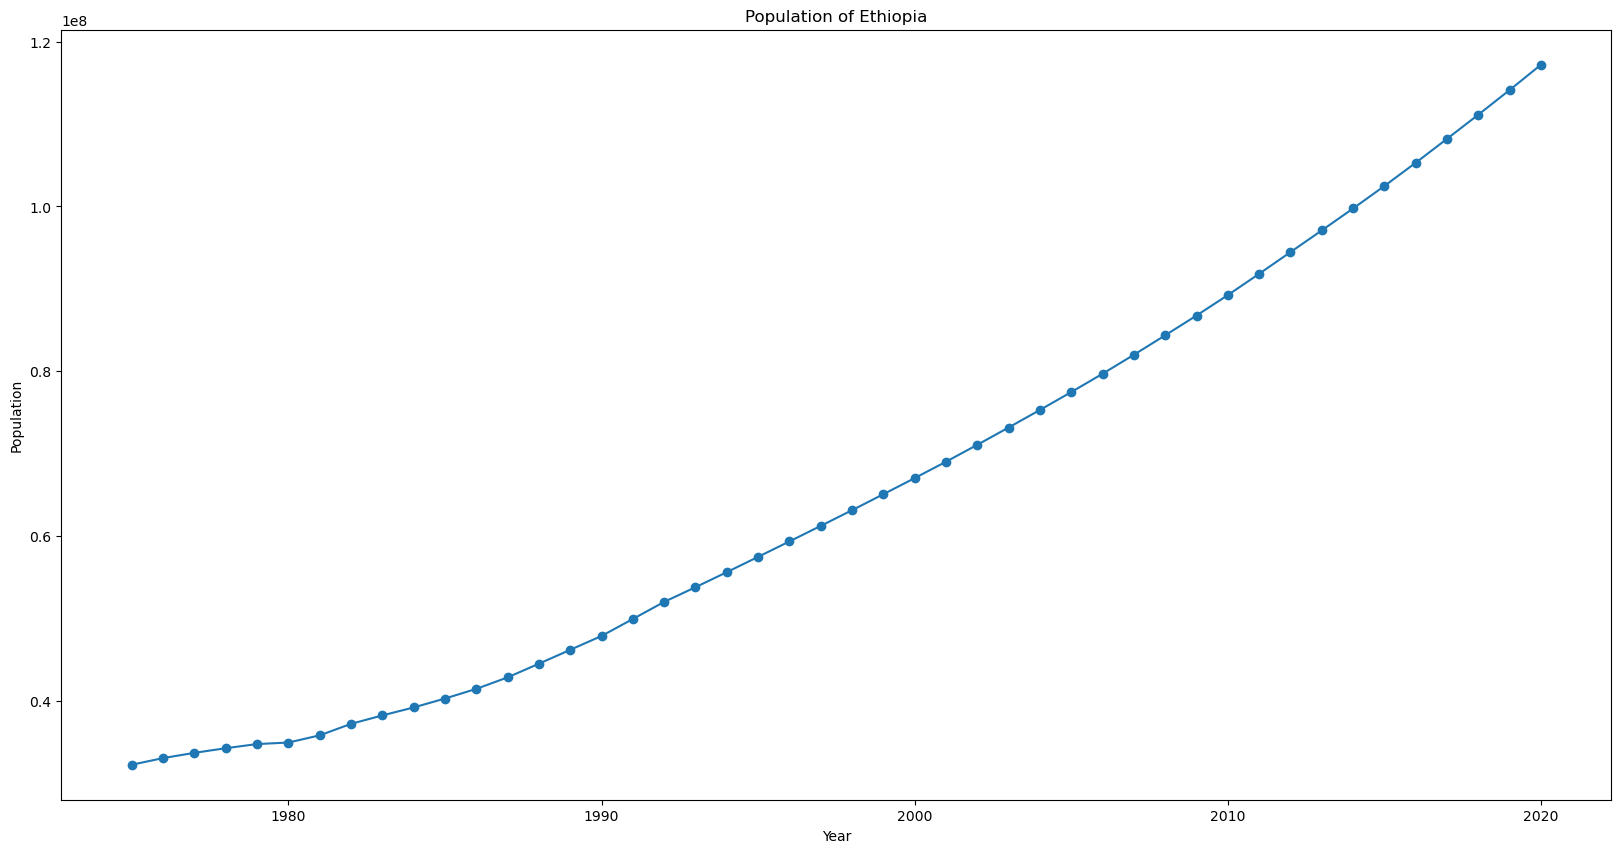

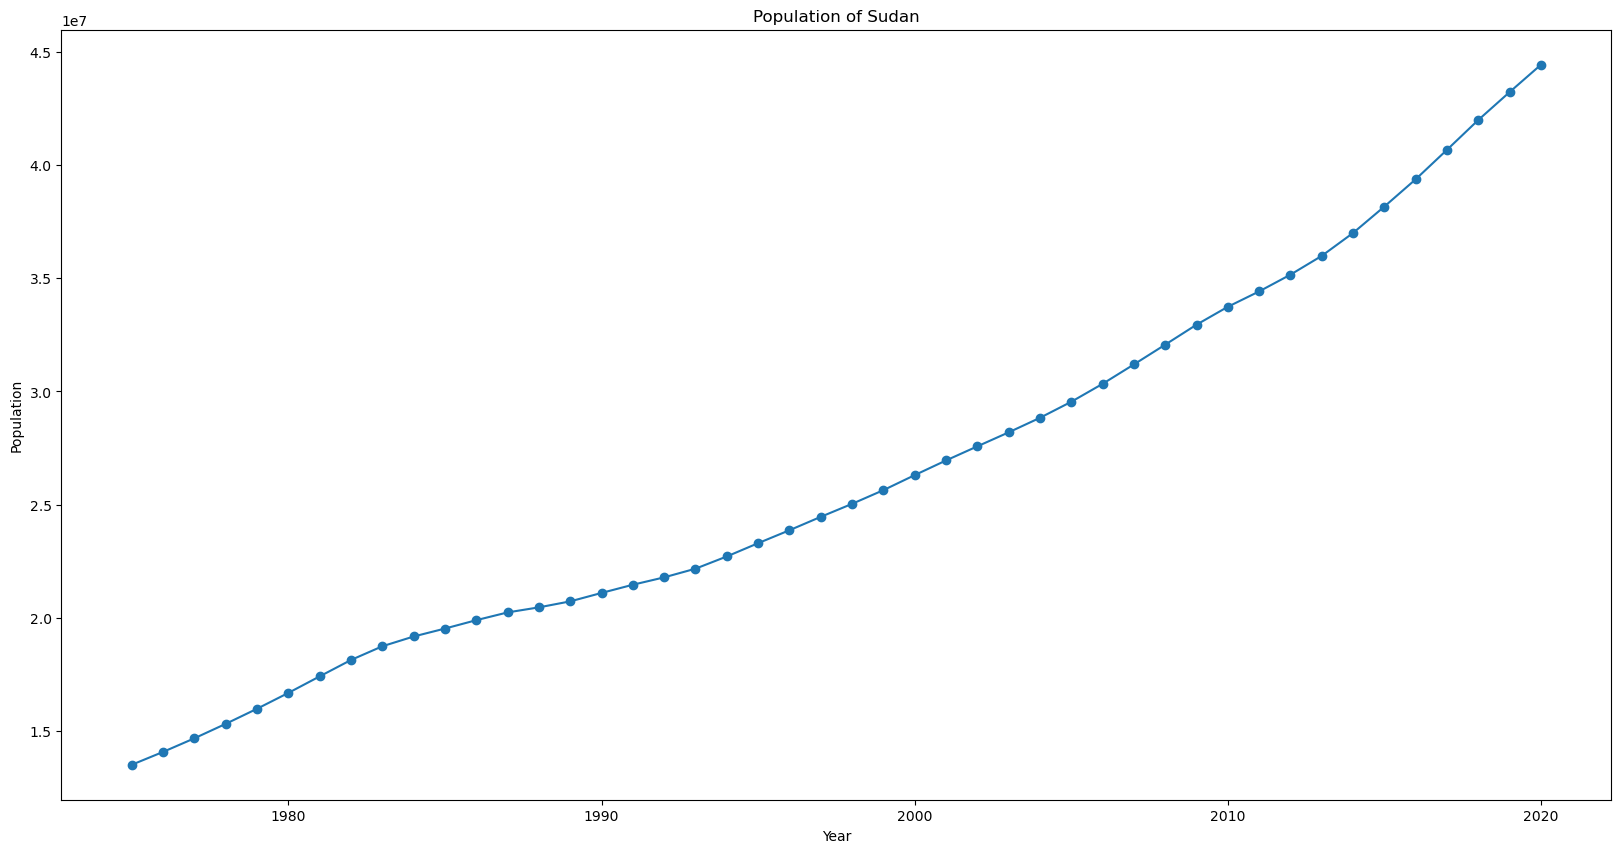

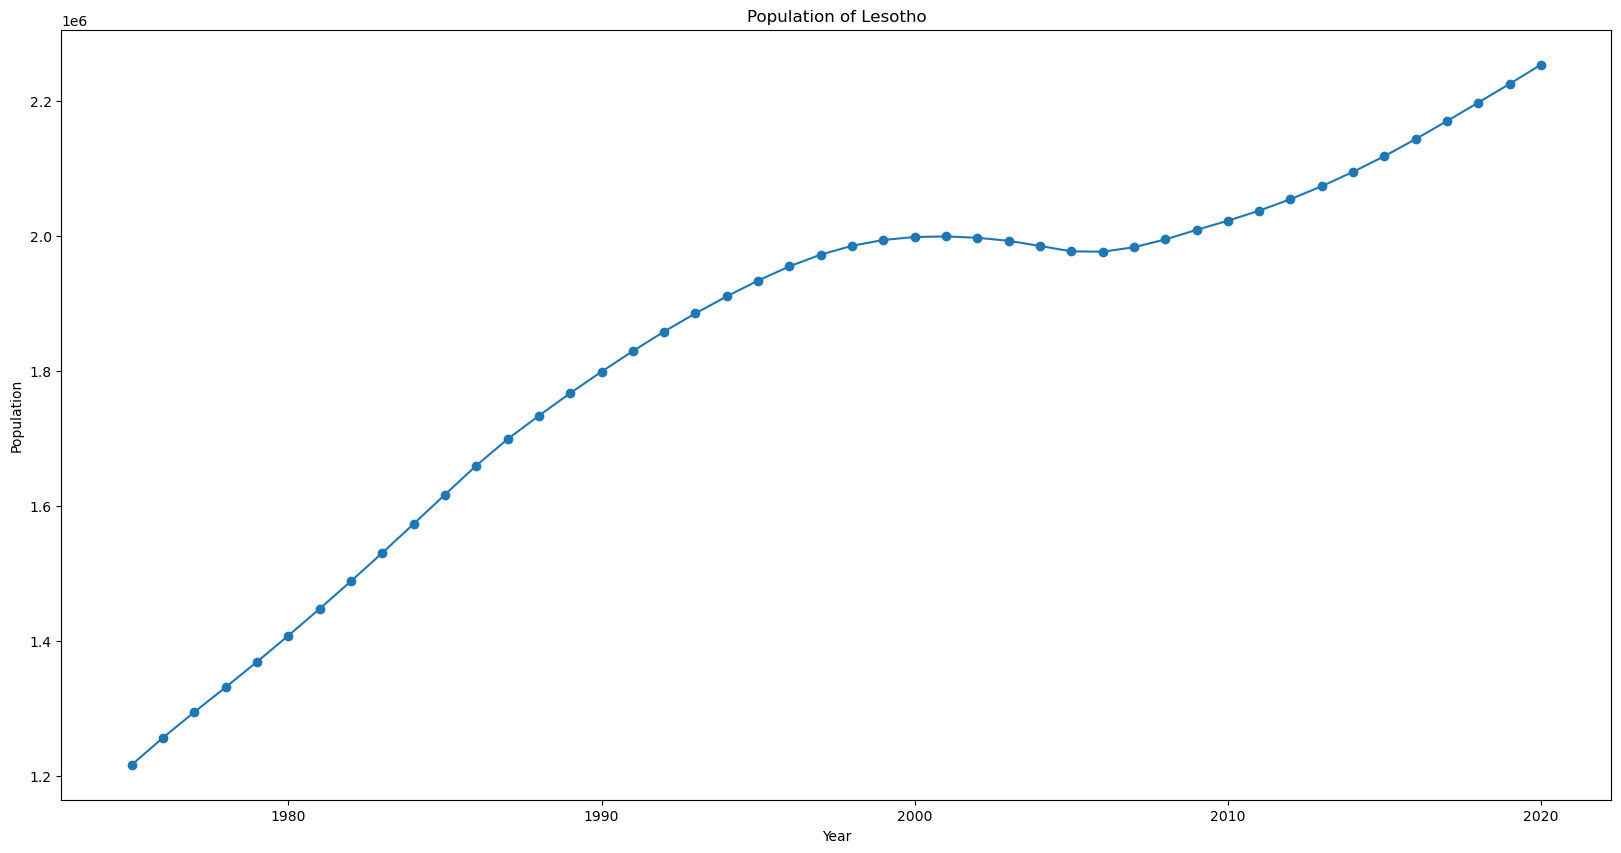

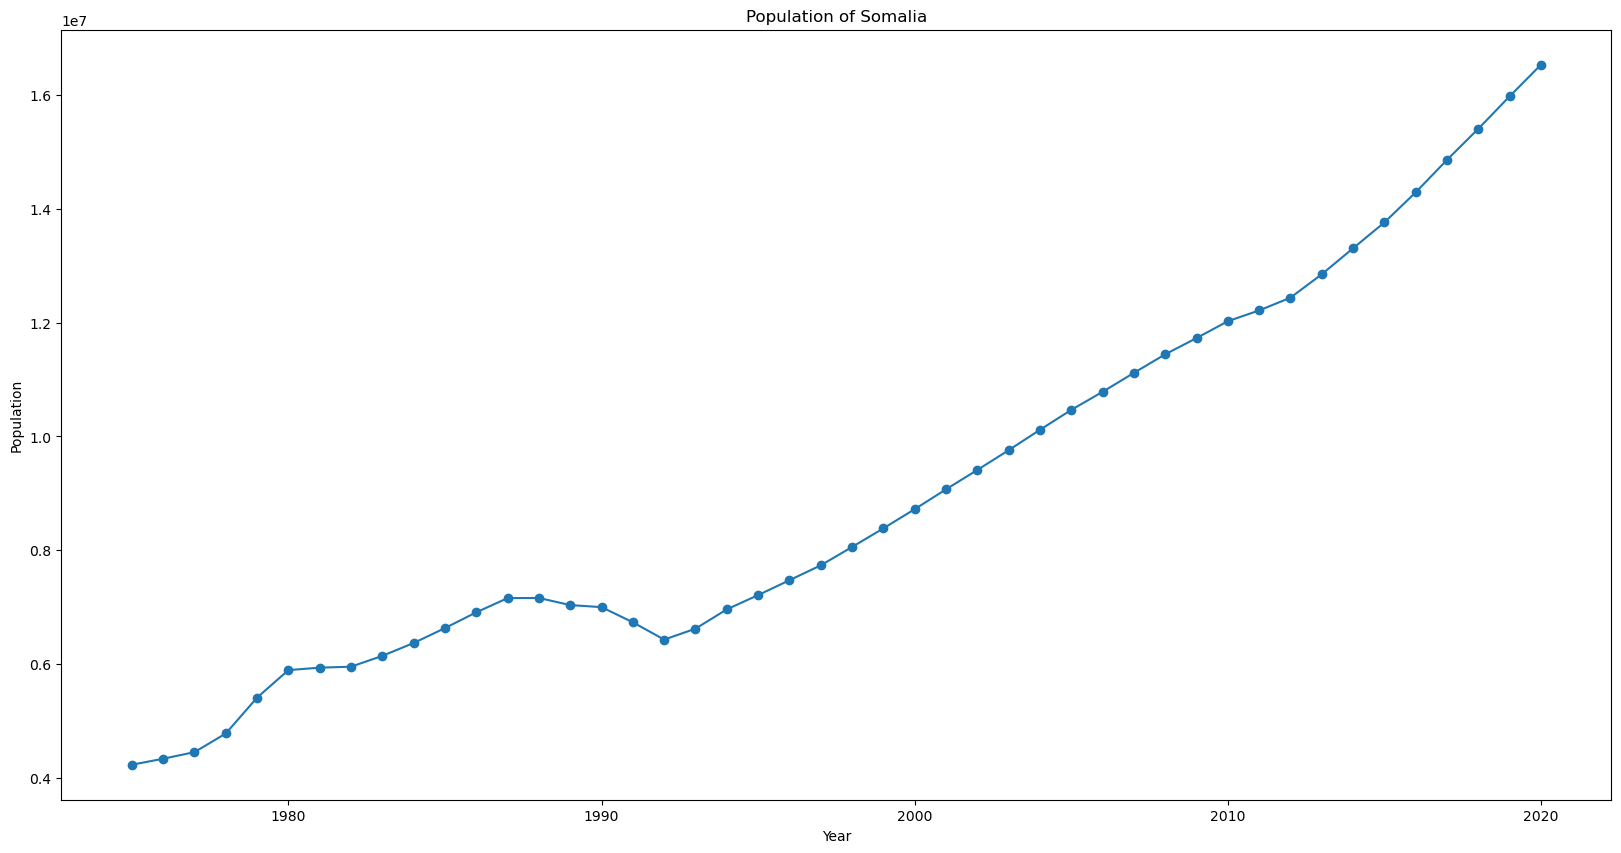

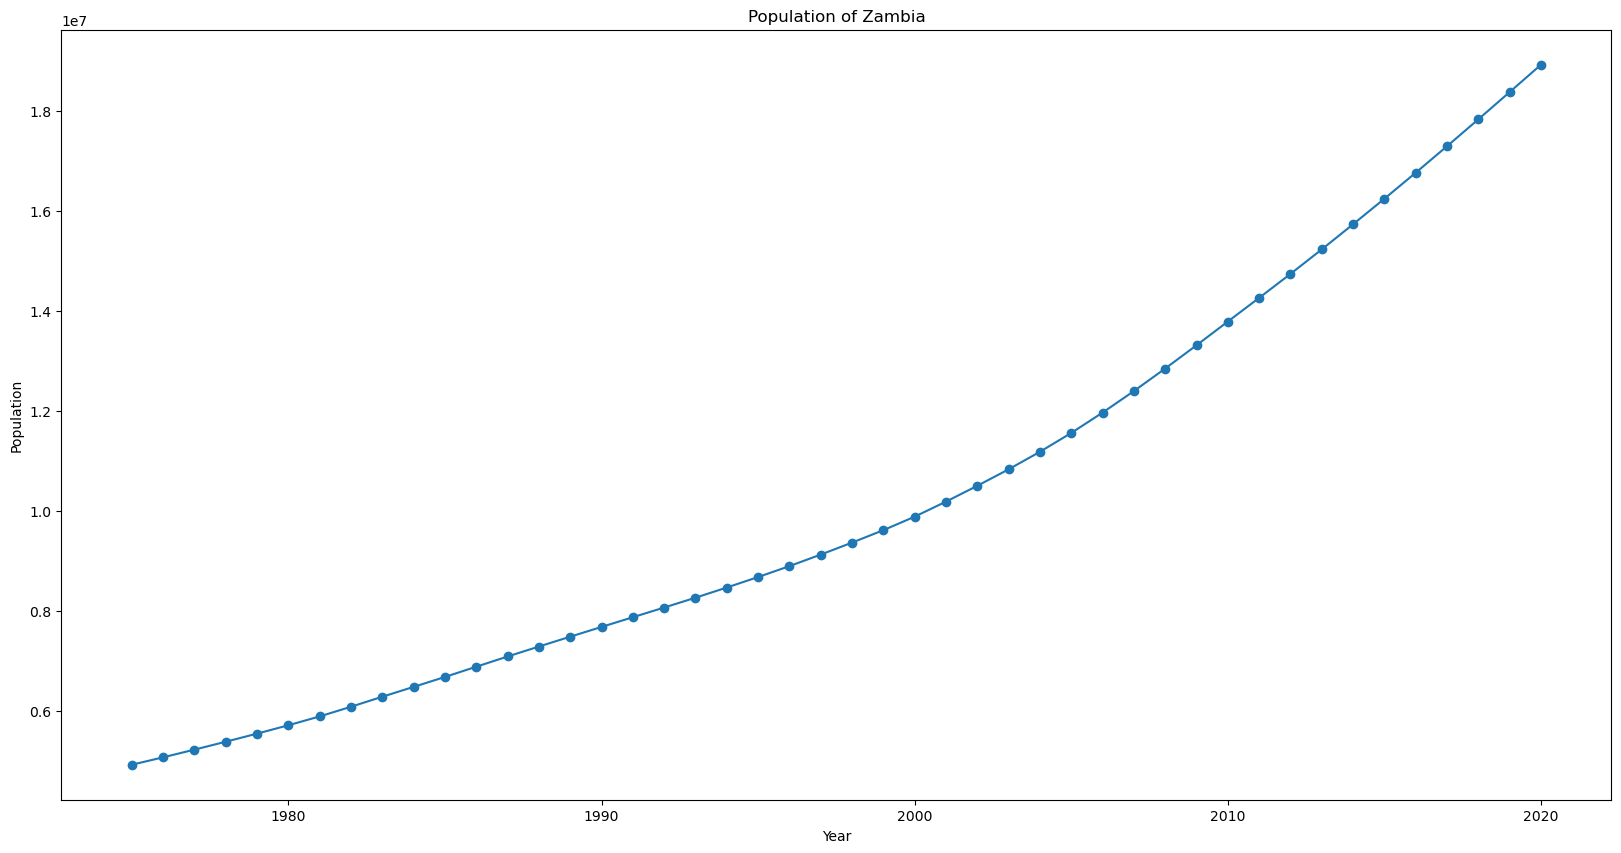

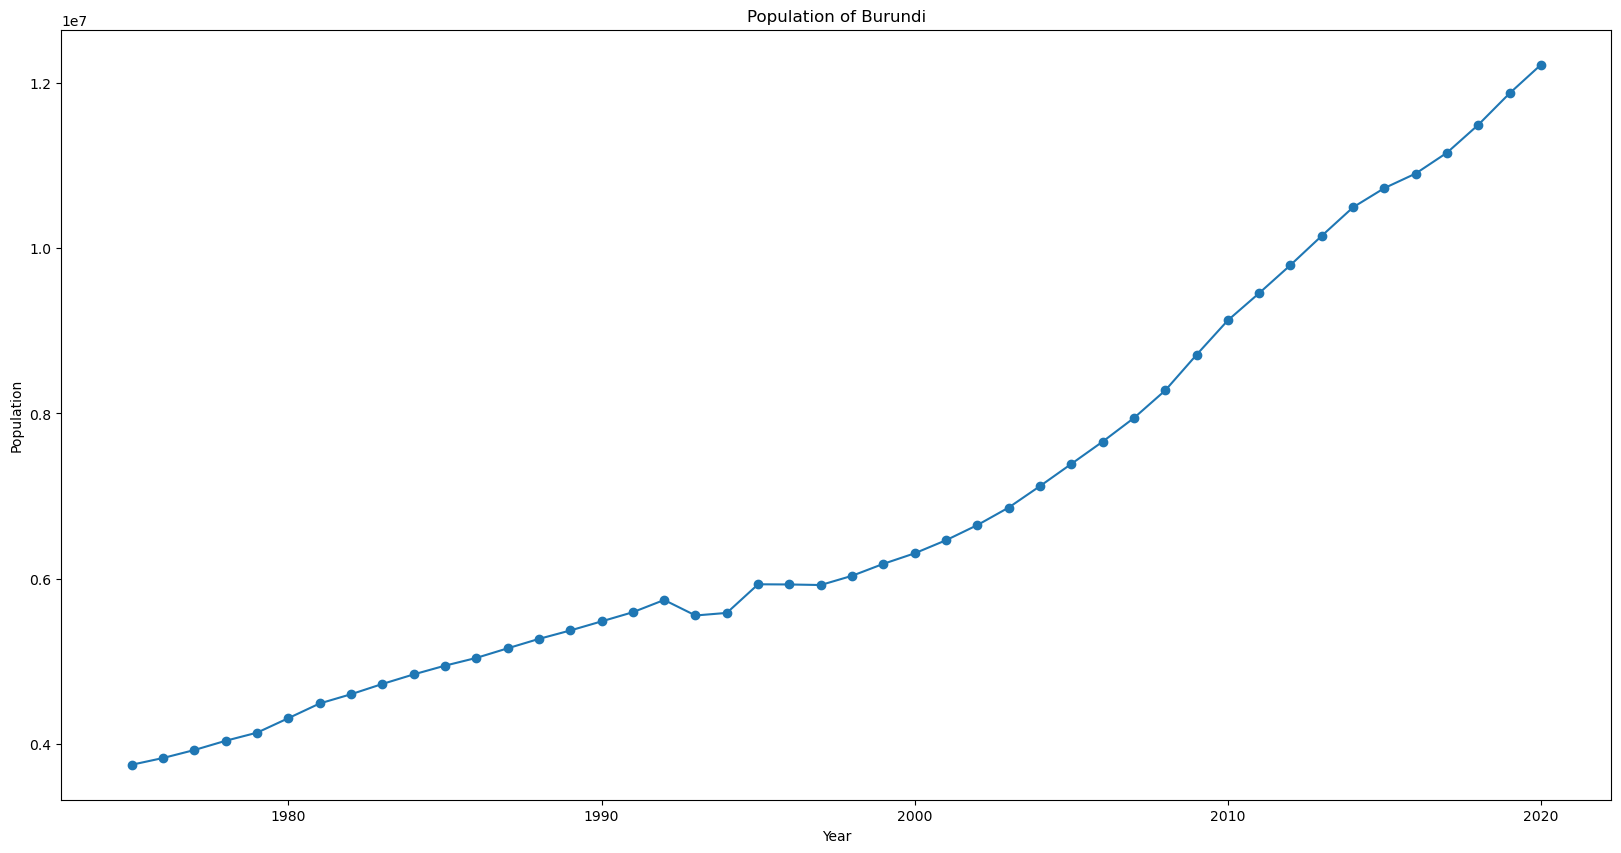

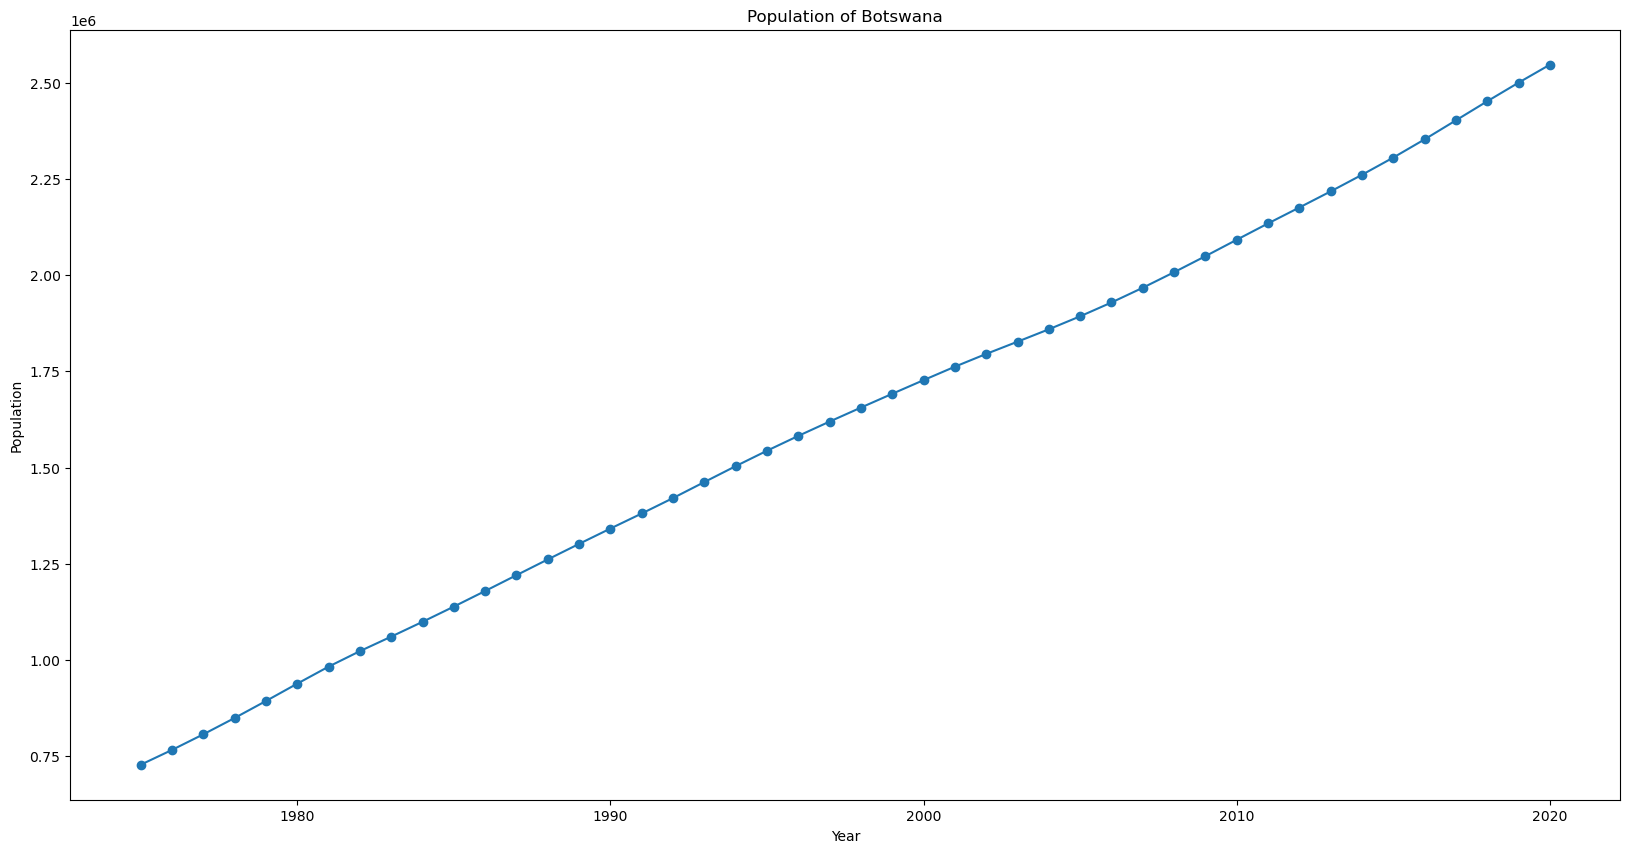

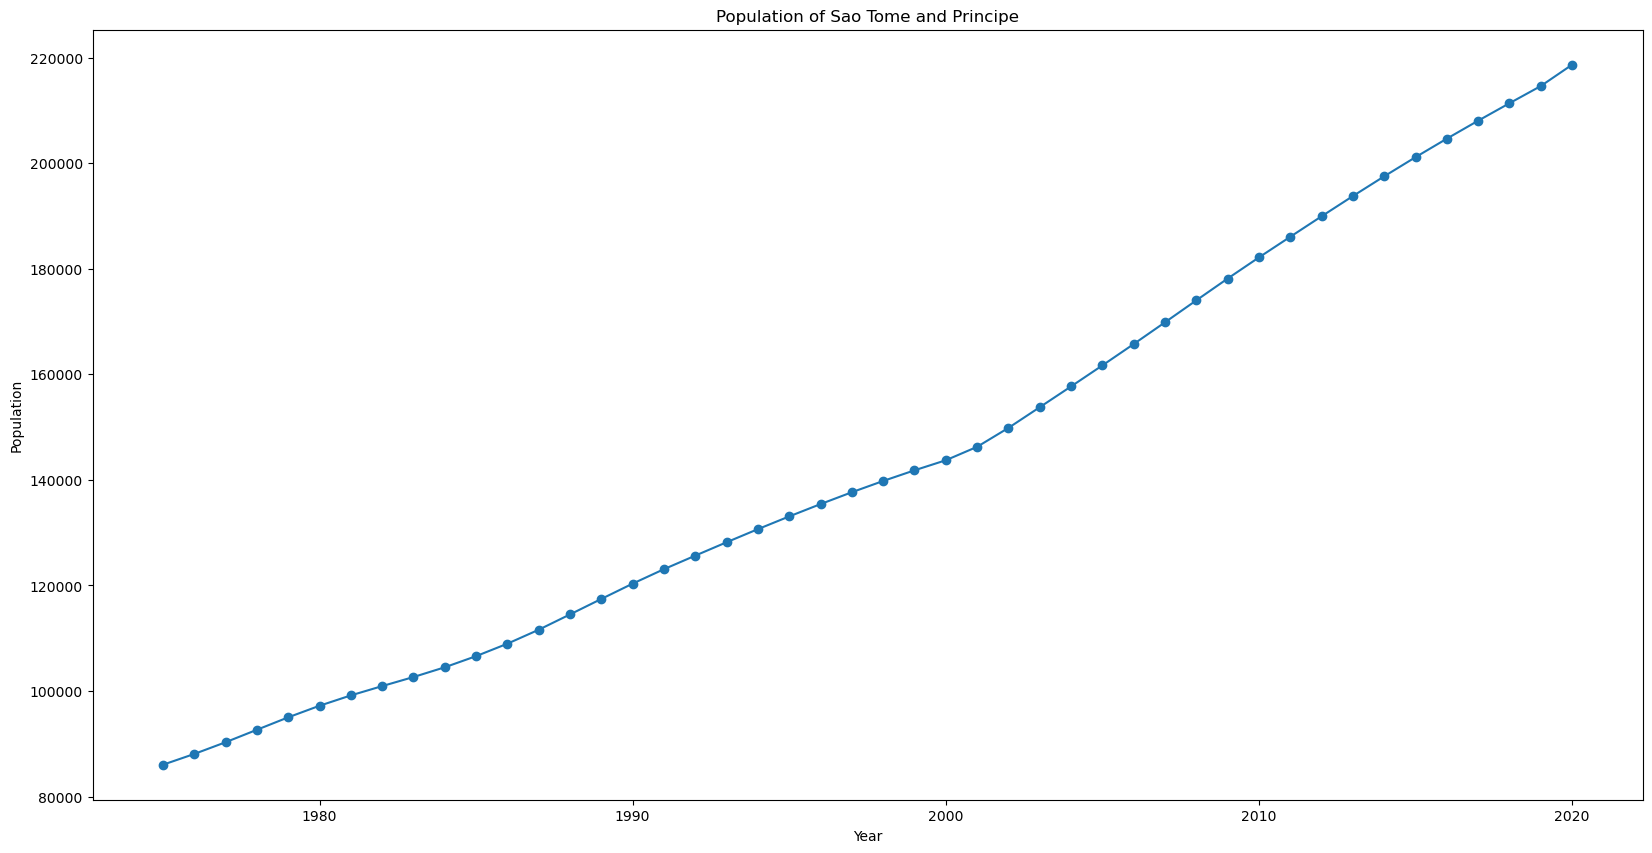

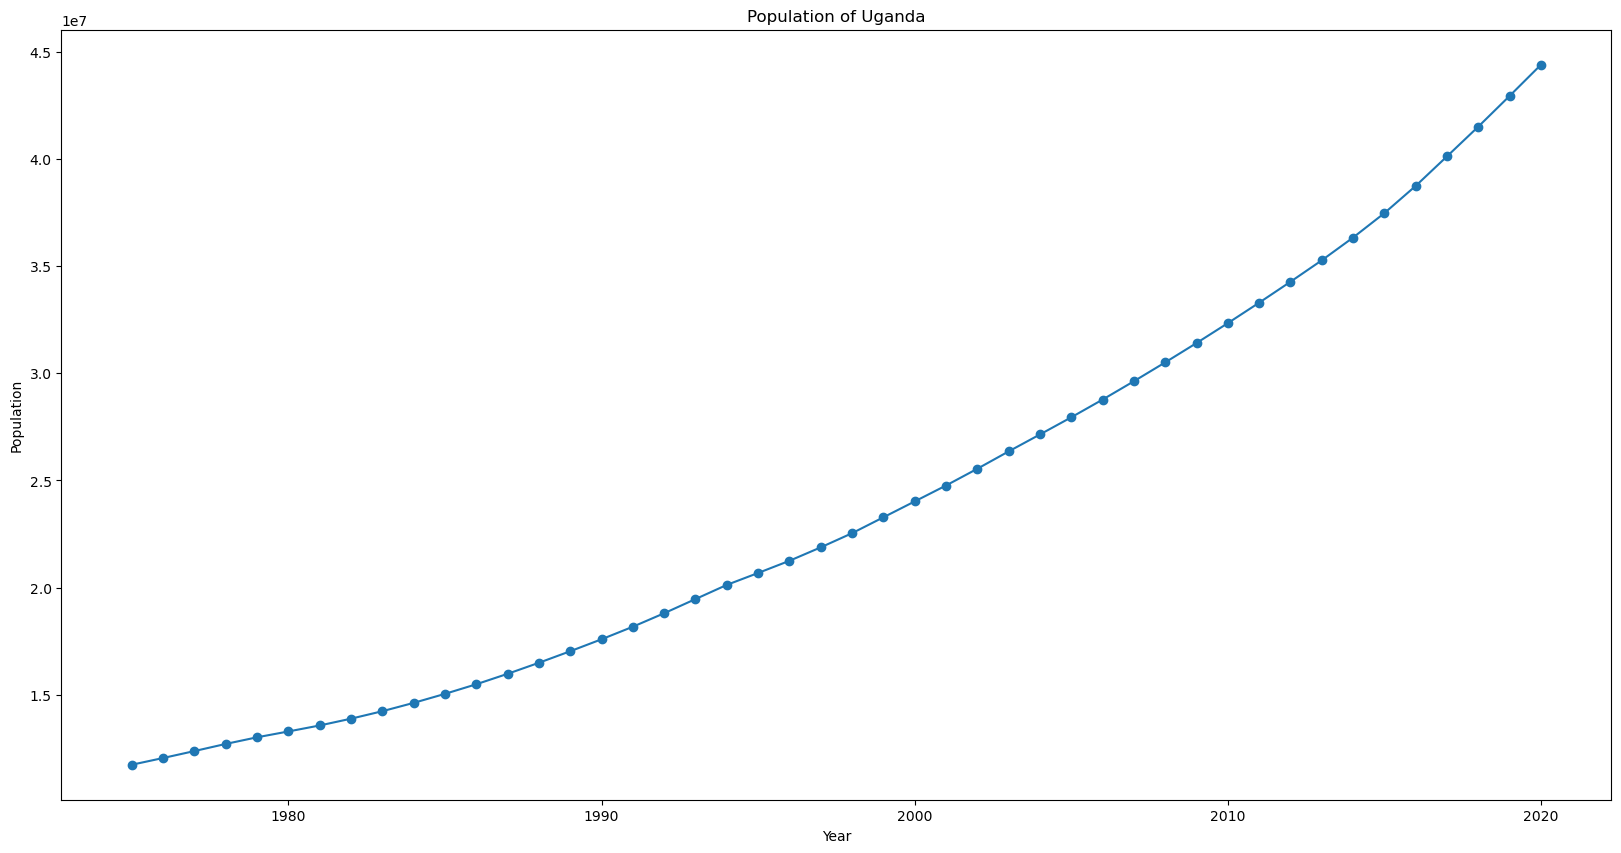

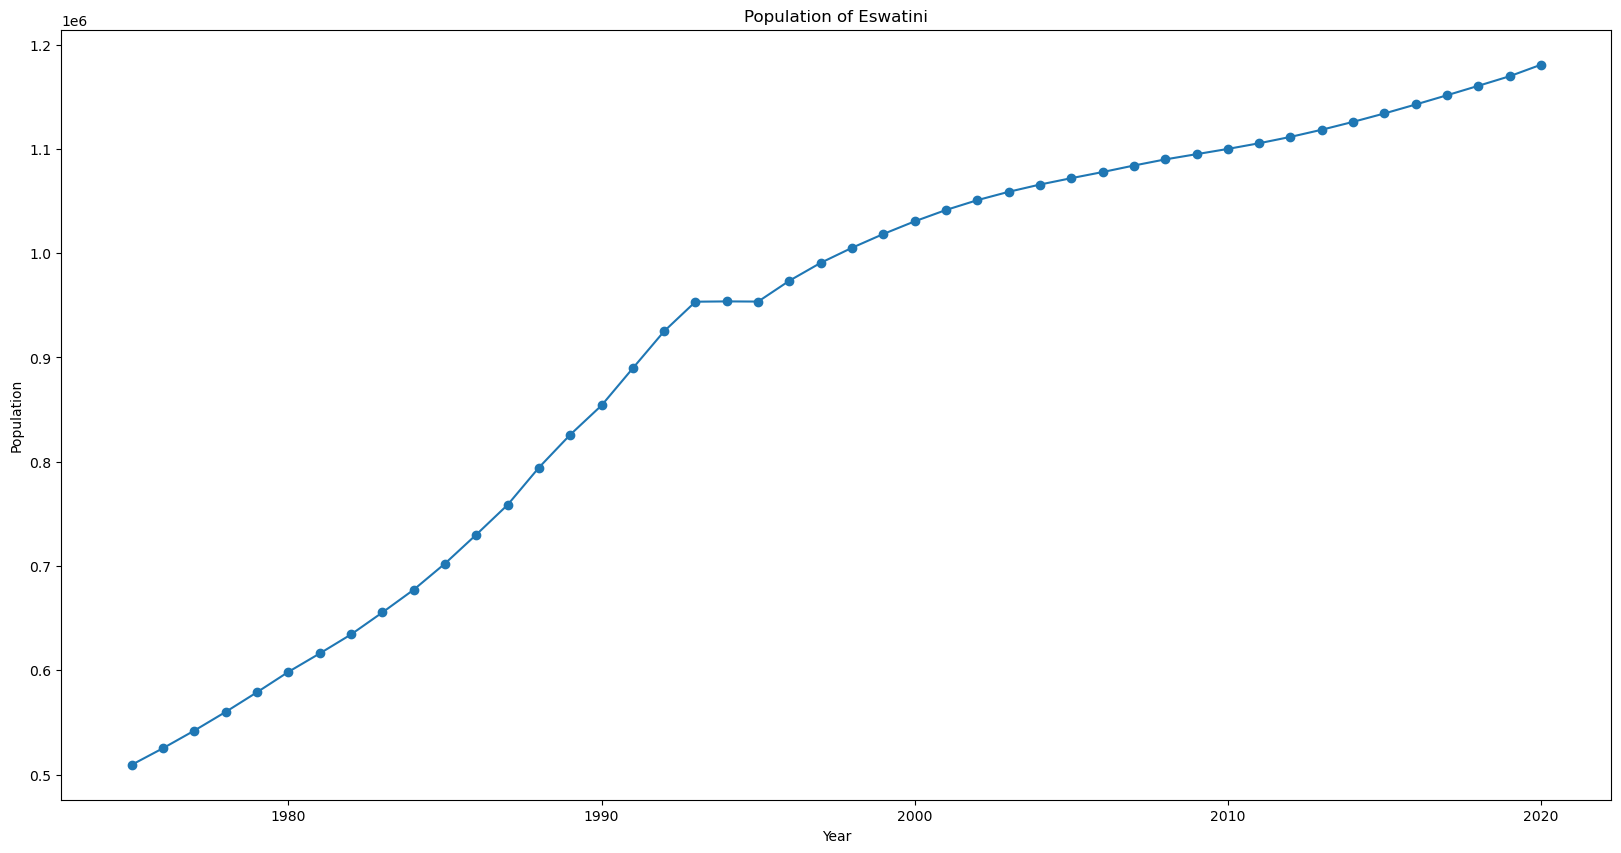

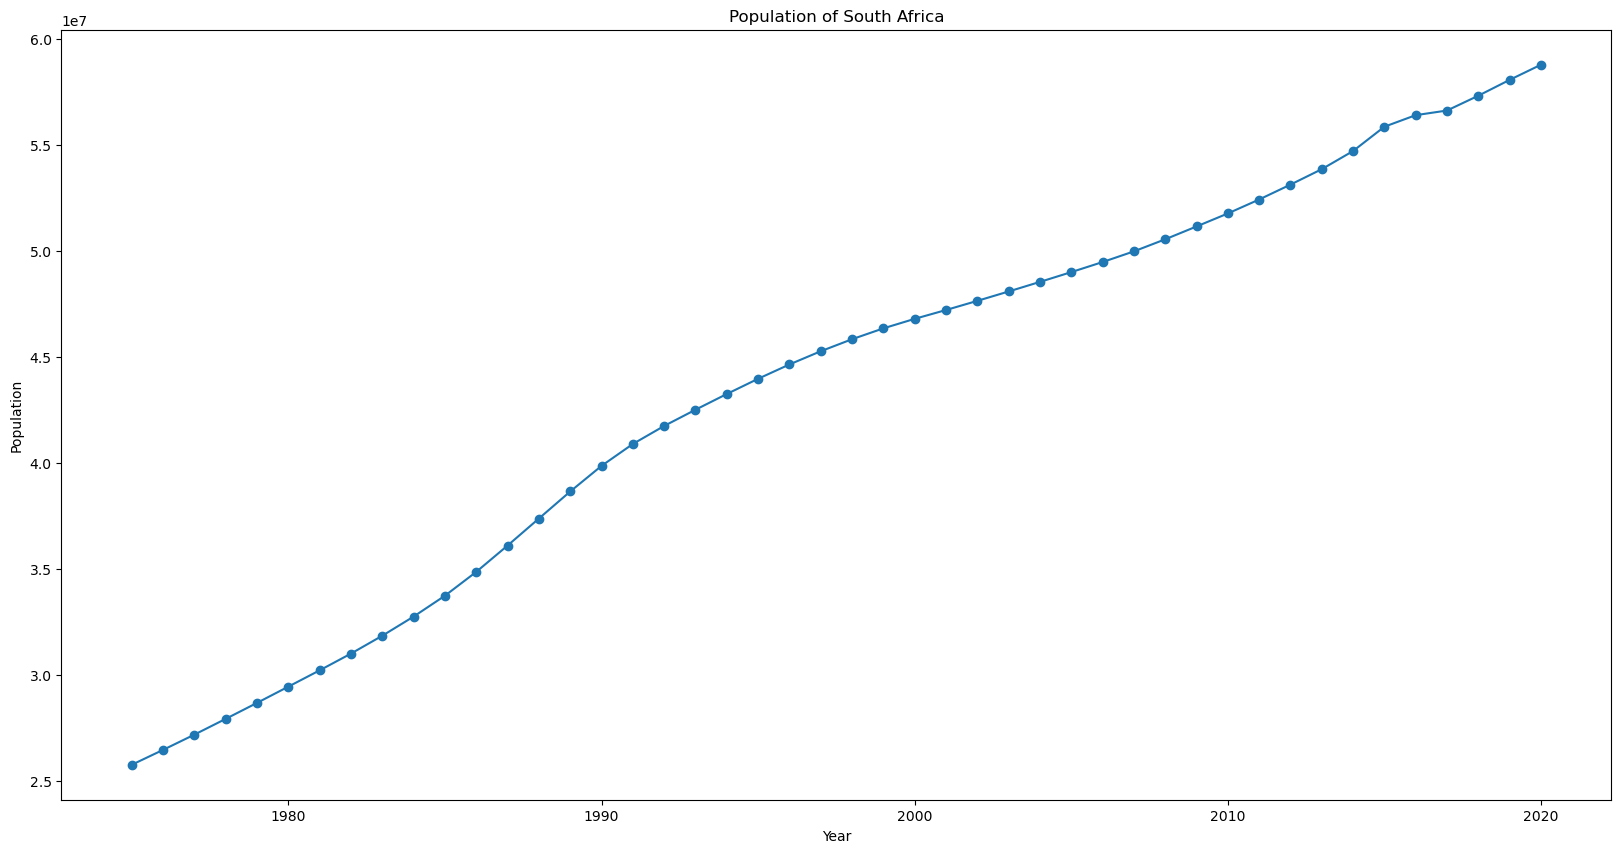

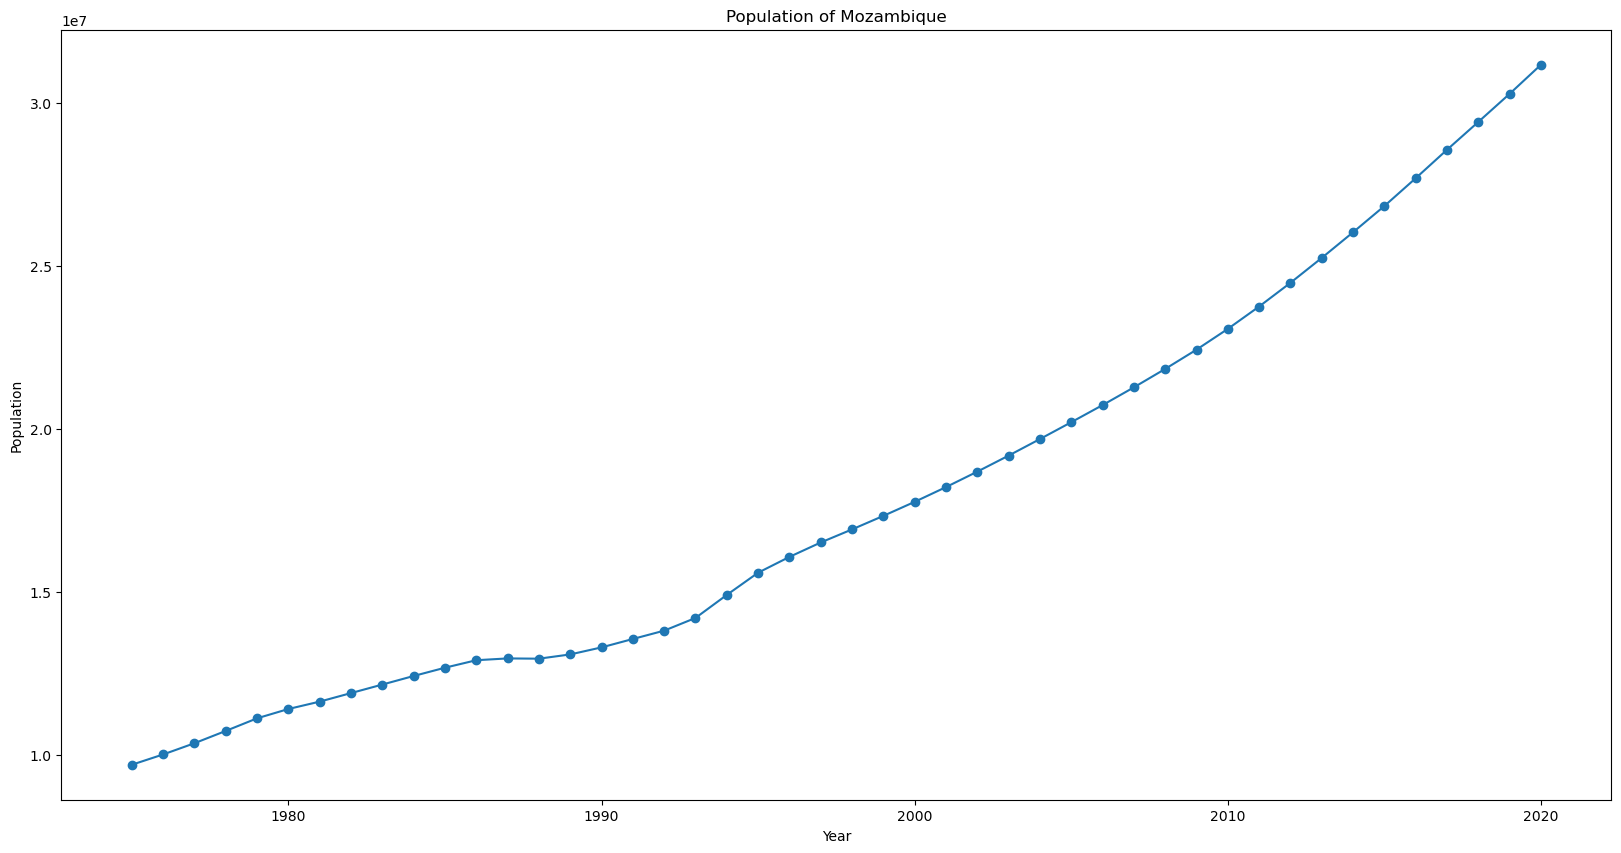

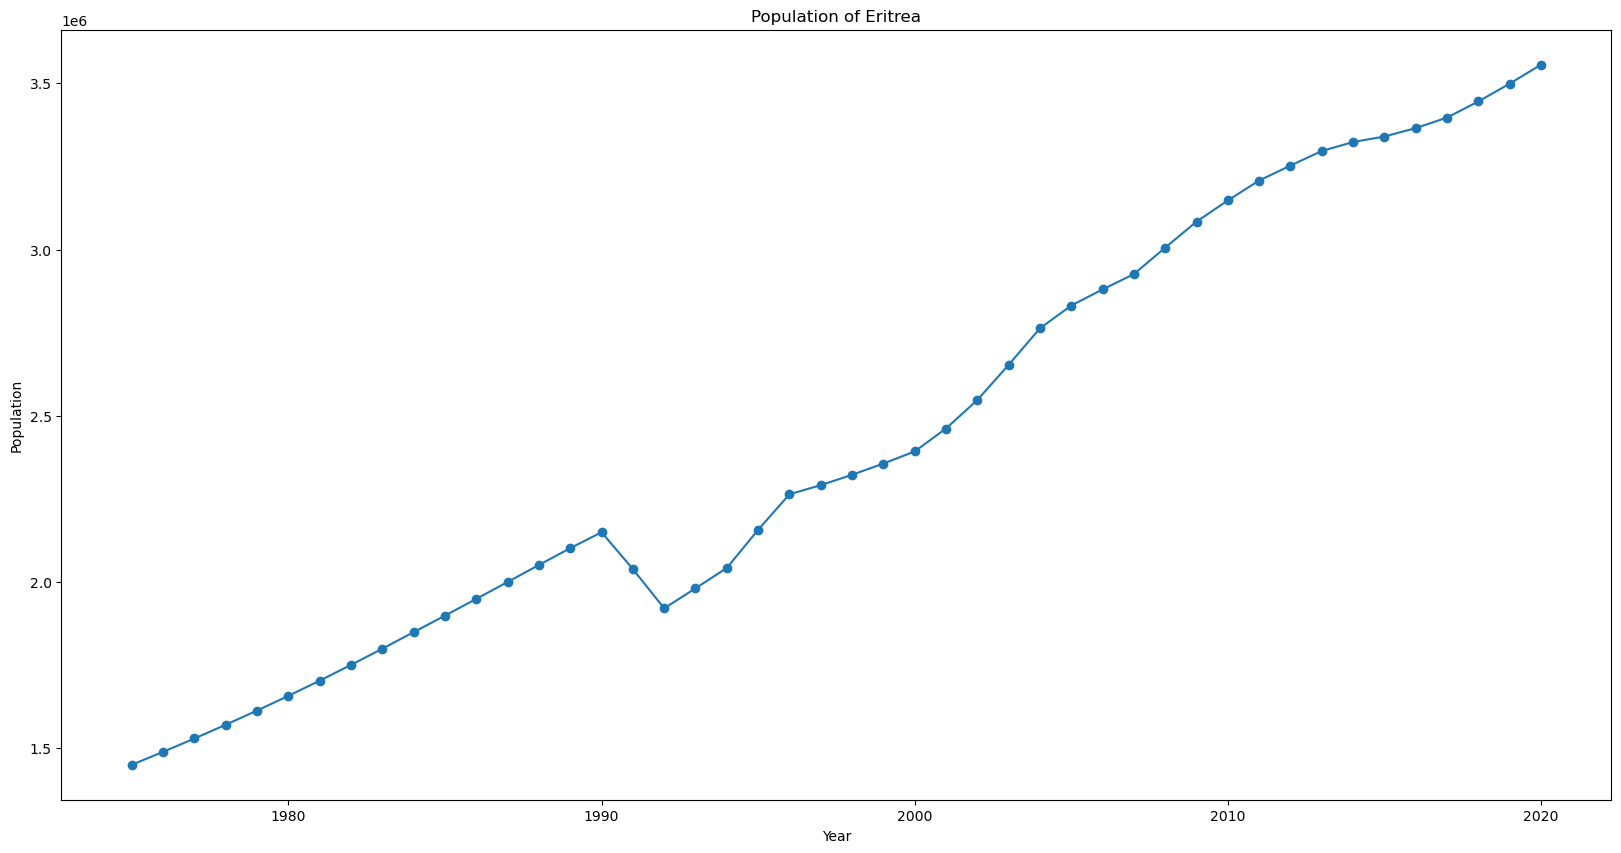

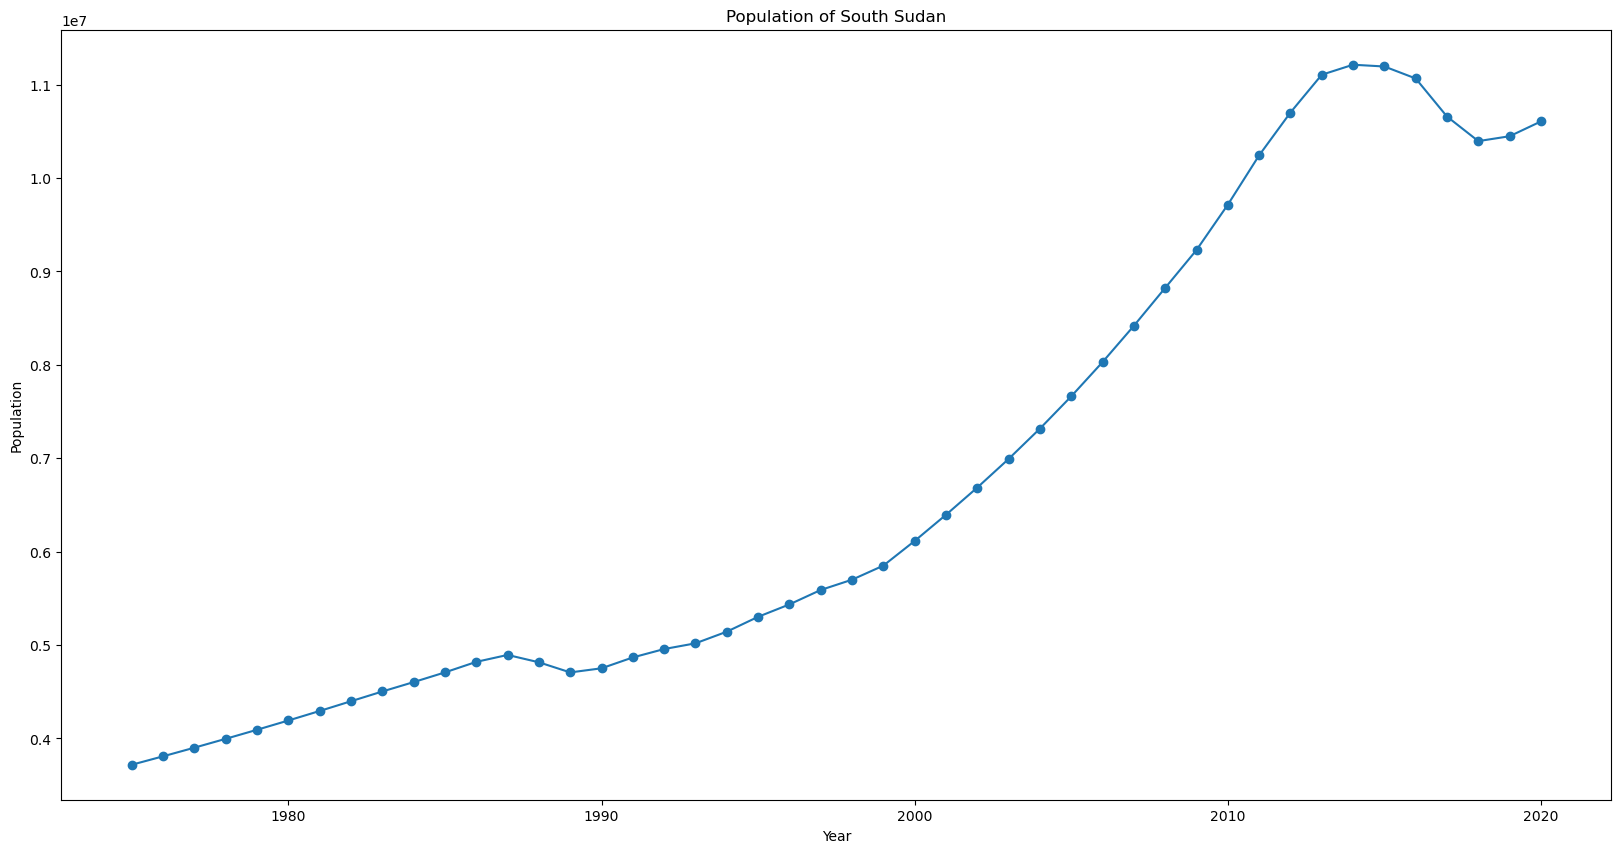

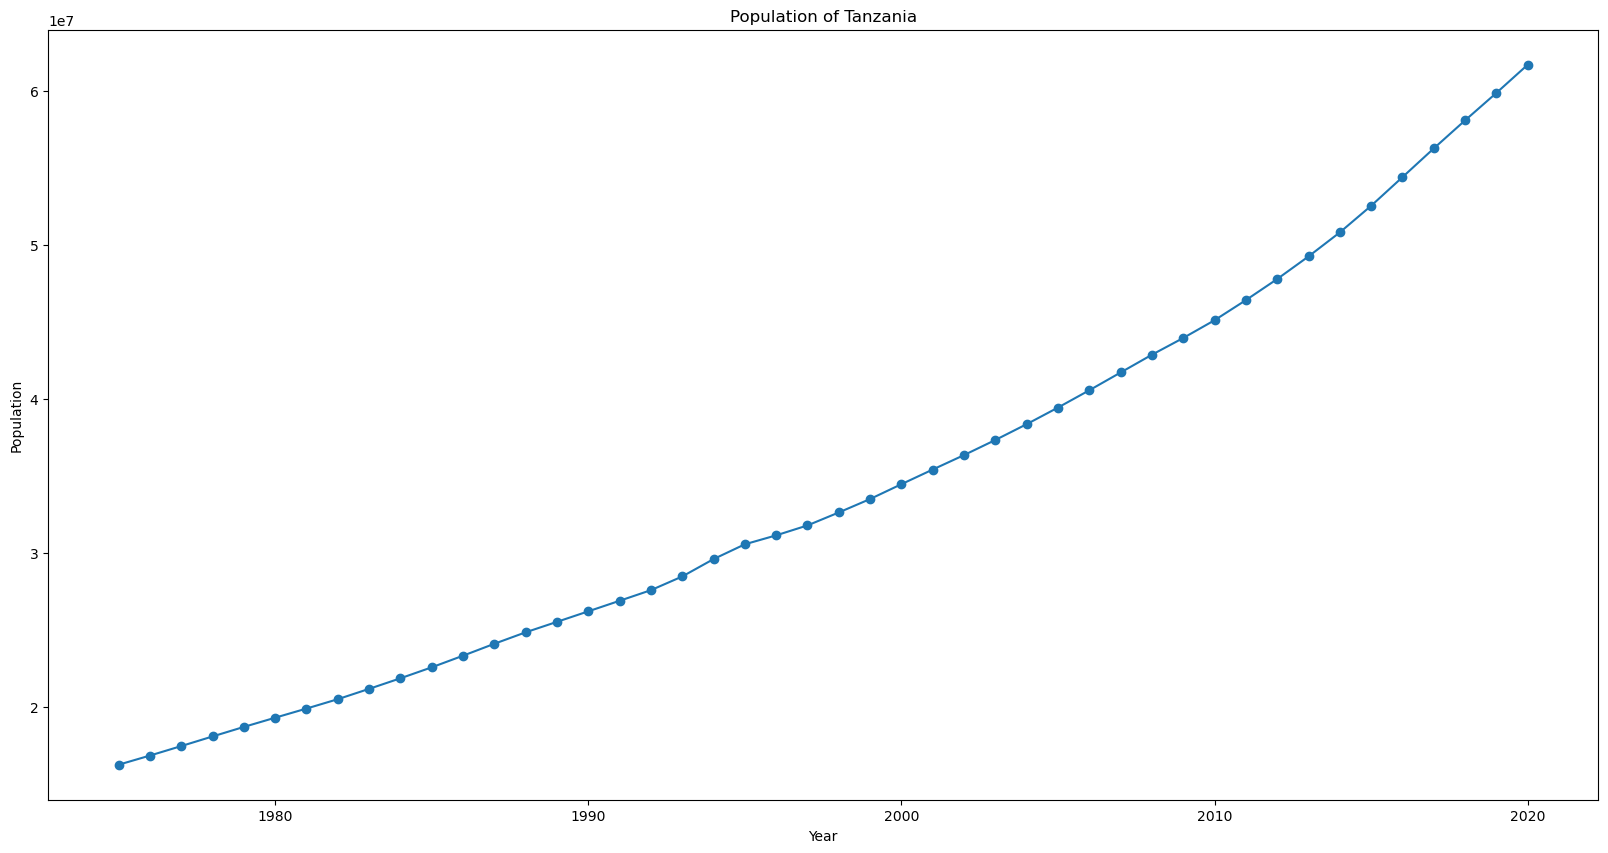

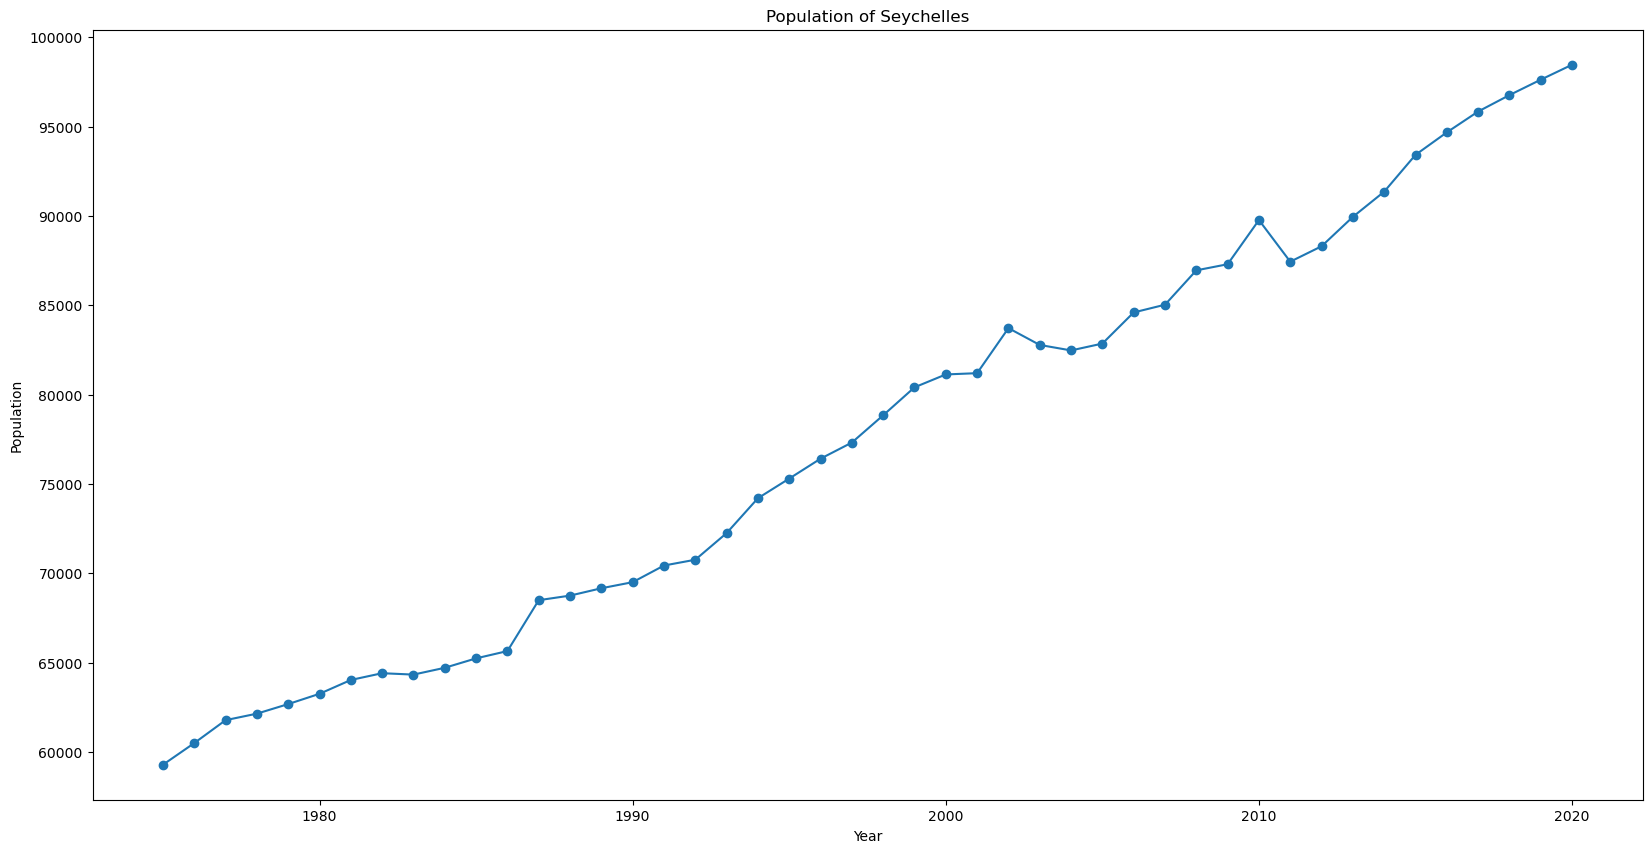

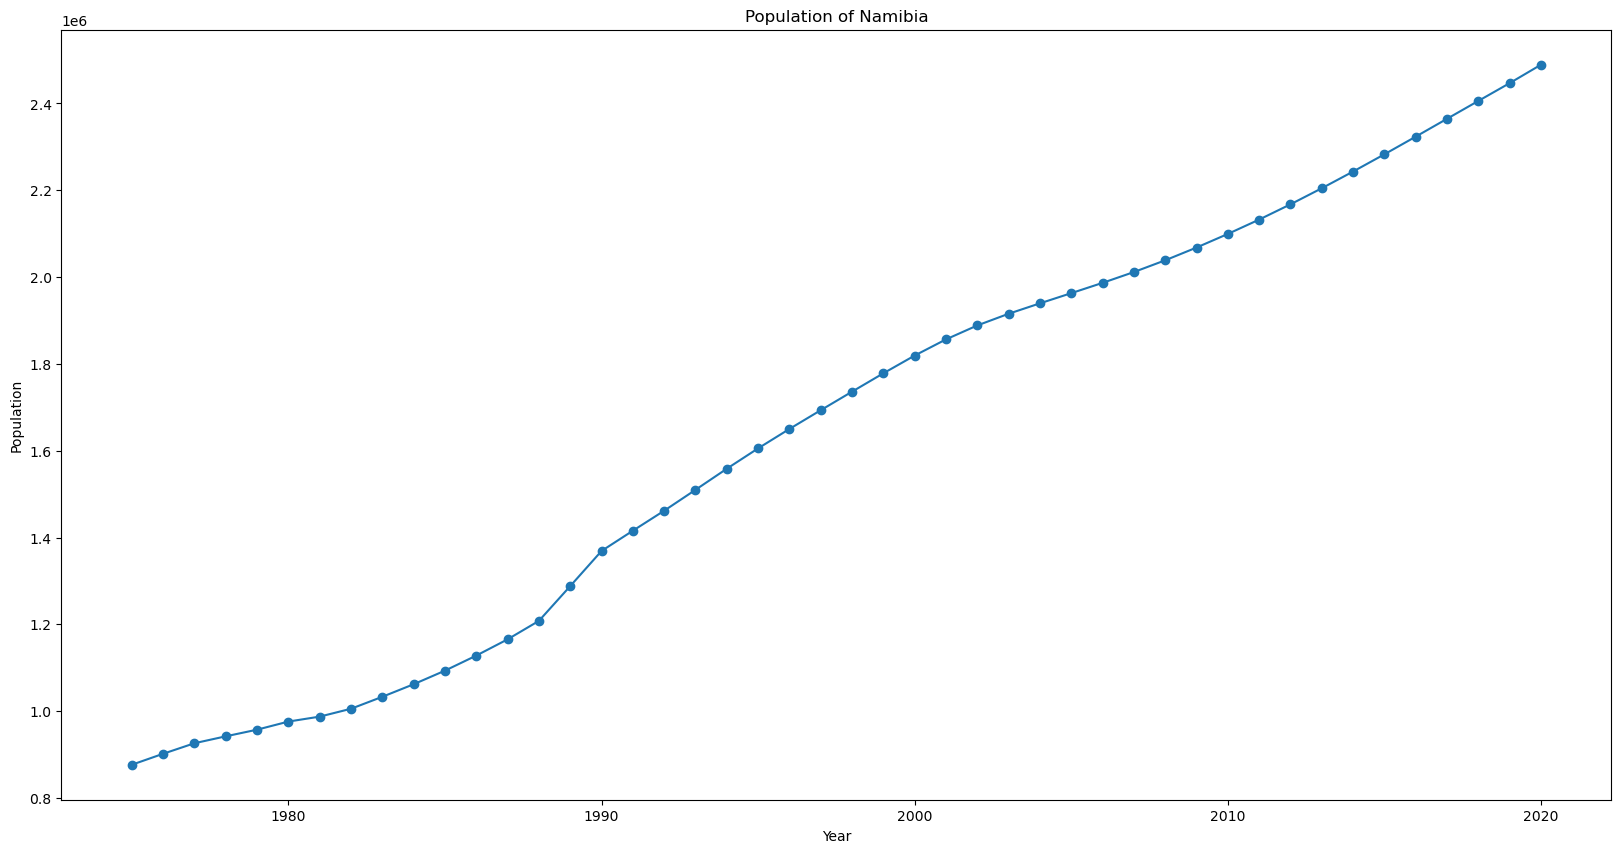

In [14]:


import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np


# Importing nesessary packages to get access to WORLD BANK DATABASES
import wbgapi as wb

# Get info for all the databaes 
#print(wb.source.info())


# population
sourcePopulation = wb.data.DataFrame('SP.POP.TOTL',time=range(2000,2016, 1),labels=True, numericTimeKeys=True).transpose()
# print(sourcePopulation)
# print(sourcePopulation.shape)
# print(type(sourcePopulation))

popNp = np.array(sourcePopulation)
# print(popNp.shape)
# print(list(popNp[1][:]))


wb.data.DataFrame('SP.POP.TOTL', economy=wb.region.members('AFE'), time=range(1975, 2021, 1),
                  labels=True, numericTimeKeys=True).set_index('Country').transpose().plot(title='Population',
                                                                                           marker='o', figsize=(20, 10))
plt.xlabel("Country")
plt.ylabel("Population")
plt.show()

# Fetching data
data = wb.data.DataFrame('SP.POP.TOTL', economy=wb.region.members('AFE'), time=range(1975, 2021, 1),
                         labels=True, numericTimeKeys=True).set_index('Country').transpose()

# iterere over alle landene og lage graf for alle landene seperat
for country in data.columns:
    data[country].plot(title=f'Population of {country}', marker='o', figsize=(20, 10))
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.show()


# OpenWeatherMap API

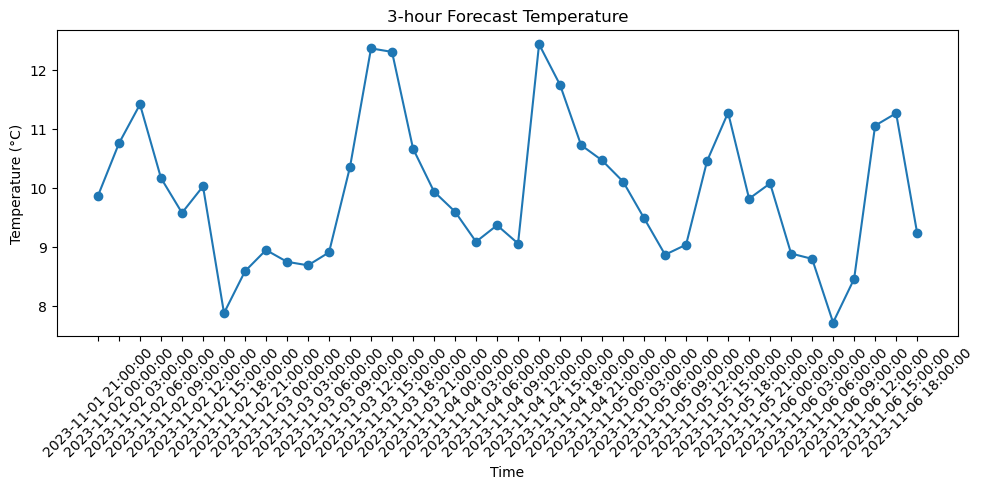

In [7]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

def get_3hour_forecast(city_name, api_key):
    base_url = "http://api.openweathermap.org/data/2.5/forecast"
    
    params = {
        'q': city_name,
        'appid': api_key,
        'units': 'metric'
    }
    
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error {response.status_code}: Unable to fetch the weather data.")
        return None

# Extract and plot the temperature
def plot_temperature(data):
    dates = [x['dt_txt'] for x in data['list']]
    temps = [x['main']['temp'] for x in data['list']]
    
    plt.figure(figsize=(10, 5))
    plt.plot(dates, temps, marker='o')
    plt.xticks(rotation=45)
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.title('3-hour Forecast Temperature')
    plt.tight_layout()
    plt.show()

# Replace 'YOUR_API_KEY' with your actual API key
api_key = '22bd0da1b9e4b48079ec27a4b17235d6'
city_name = 'london'

forecast_data = get_3hour_forecast(city_name, api_key)
if forecast_data:
    plot_temperature(forecast_data)


# Importere datasett fra excel fil 



In [3]:
# Gir
import pandas as pd
import numpy as np

dataset = pd.read_excel('Datasett_vaktutkallingar.xlsx')

In [8]:

dataset.head(n=5)  #skriver ut 10 første rad

,AOnr,Objektnr,Objektnavn,Jobbomr.,Jobbtype,Status,AO tekst,K,Pr.,Pl. ferdig,Utførande,Est.,Fakt,Fag,Ferdig
0,730823,KJ-442,Truck Diesel Toyota 40-8FD60,Vedlikehald,Korrigerande,Ferdigmeldt,Høy temperatur ---> fyllt kjølebveske,NaN,U,2021-09-01,vakt_kj,2.0,1.0,NaN,2021-09-01
1,730824,EP-217-007,Fyllesjakt for kaldt bad (RR-anl),Vedlikehald,Korrigerande,Ferdigmeldt,Klump i sjakt tygger ikke unna ---> Sjå 5xWhy,3.0,U,2021-09-01,vakt_mekanisk,2.0,2.0,Mekanisk,2021-09-02
2,730825,KJ-565,"Tappekjøretøy, Hydeq MTV 07",Vedlikehald,Korrigerande,Ferdigmeldt,Defekt ac anlegg ---> Kobling på oljekompresso...,2.0,U,2021-09-01,vakt_kj,2.0,2.0,NaN,2021-09-01
3,730827,SP-860-000,"Støpemaskin A felles, div.",Vedlikehald,Korrigerande,Ferdigmeldt,Der er to bolter som er stivna i brodet under ...,1.0,U,2021-09-01,vakt_mekanisk,2.0,2.0,Mekanisk,2021-09-02
4,730828,KJ-207,Anodeveksler SMV,Vedlikehald,Korrigerande,Ferdigmeldt,"Sleit slange i klokke, tok fyr i klokke så må ...",3.0,U,2021-09-01,vakt_kj,2.0,2.0,Mekanisk,2021-09-02


In [4]:
dataset.tail(n=5)  # skriver ut de siste 5 for å sikre at alle data er hentet med

,AOnr,Objektnr,Objektnavn,Jobbomr.,Jobbtype,Status,AO tekst,K,Pr.,Pl. ferdig,Utførande,Est.,Fakt,Fag,Ferdig
4105,793113,SP-876-220,Kompressor 1. øst,Vedlikehald,Korrigerande,Ferdigmeldt,Sikring utløyst på kompressor,3.0,U,2023-08-30,vakt_elektro,2.0,2.5,Elektro,2023-08-31
4106,791625,KJ-205,Anodeveksler SMV,Vedlikehald,Korrigerande,Ferdigmeldt,Olje lekkasje på tobbe sylinder ---> Bytte syl...,3.0,U,2023-08-31,vakt_kj,2.0,2.5,NaN,2023-08-13
4107,793158,SP-440-006,Sponpresse nr.5. sag 5.,Vedlikehald,Korrigerande,Ferdigmeldt,kraftig olje lekkasje på sponpresse sag 5,3.0,U,2023-08-31,vakt_mekanisk,2.0,2.0,Mekanisk,2023-08-31
4108,793221,BY-209,Silo A,Vedlikehald,Korrigerande,Ferdigmeldt,Det er registrert lekasje på silotopp må kontr...,4.0,U,2023-08-31,vakt_mekanisk,5.0,5.0,Mekanisk,2023-08-31
4109,793227,AK-411-020,Robot arm m/griper,Vedlikehald,Korrigerande,Ferdigmeldt,Knekka tilt sylinder + føring på GF i SP5 --->...,2.0,U,2023-08-31,vakt_mekanisk,3.0,3.0,Mekanisk,2023-09-01


In [5]:
# finner ut hvor mange data celler som er tomme
missing_data = dataset.isna().sum()

print(missing_data)

AOnr            0
Objektnr        0
Objektnavn      0
Jobbomr.        0
Jobbtype       48
Status          0
AO tekst        0
K             440
Pr.             0
Pl. ferdig      0
Utførande       0
Est.           46
Fakt           22
Fag           893
Ferdig          1
dtype: int64


In [6]:
# Filtrere listen slik at vi får alle overskrivtene til de som mangler verdier
missing_columns = dataset.columns[dataset.isna().any()].tolist()
print(missing_columns)

['Jobbtype', 'K', 'Est.', 'Fakt', 'Fag', 'Ferdig']


In [22]:
# Dette kan du bruke for å endre de tomme feltene til andre verdier
for column in missing_columns:
    
    if(np.issubdtype(dataset[column].dtype, np.number)):
        dataset[column].fillna(-1, inplace=True)

    elif dataset[column].dtype == 'object':
        dataset[column].fillna('Ukjent', inplace=True)

    elif np.issubdtype(dataset[column].dtype, np.datetime64):
         dataset[column].fillna("1990-01-01 00:00:00", inplace=True)
        


In [32]:
# finner ut hvor mange data celler som er tomme
missing_data = dataset.isna().sum()

print(m)
print(missing_data)

Index([], dtype='object')
AOnr          0
Objektnr      0
Objektnavn    0
Jobbomr.      0
Jobbtype      0
Status        0
AO tekst      0
K             0
Pr.           0
Pl. ferdig    0
Utførande     0
Est.          0
Fakt          0
Fag           0
Ferdig        0
dtype: int64


In [8]:
dataset.head() # printe datasettet igjen for å se at all stemmer

,AOnr,Objektnr,Objektnavn,Jobbomr.,Jobbtype,Status,AO tekst,K,Pr.,Pl. ferdig,Utførande,Est.,Fakt,Fag,Ferdig
0,730823,KJ-442,Truck Diesel Toyota 40-8FD60,Vedlikehald,Korrigerande,Ferdigmeldt,Høy temperatur ---> fyllt kjølebveske,-1.0,U,2021-09-01,vakt_kj,2.0,1.0,Ukjent,2021-09-01
1,730824,EP-217-007,Fyllesjakt for kaldt bad (RR-anl),Vedlikehald,Korrigerande,Ferdigmeldt,Klump i sjakt tygger ikke unna ---> Sjå 5xWhy,3.0,U,2021-09-01,vakt_mekanisk,2.0,2.0,Mekanisk,2021-09-02
2,730825,KJ-565,"Tappekjøretøy, Hydeq MTV 07",Vedlikehald,Korrigerande,Ferdigmeldt,Defekt ac anlegg ---> Kobling på oljekompresso...,2.0,U,2021-09-01,vakt_kj,2.0,2.0,Ukjent,2021-09-01
3,730827,SP-860-000,"Støpemaskin A felles, div.",Vedlikehald,Korrigerande,Ferdigmeldt,Der er to bolter som er stivna i brodet under ...,1.0,U,2021-09-01,vakt_mekanisk,2.0,2.0,Mekanisk,2021-09-02
4,730828,KJ-207,Anodeveksler SMV,Vedlikehald,Korrigerande,Ferdigmeldt,"Sleit slange i klokke, tok fyr i klokke så må ...",3.0,U,2021-09-01,vakt_kj,2.0,2.0,Mekanisk,2021-09-02


In [14]:
# looper gjennom datasettet og skriver ut radene med na verdi for å sjekke

nan_rows = dataset[dataset.isna().any(axis=1)]
rows_list = []

pd.set_option('display.max_rows', None) 

# Filtrere datasettet til å skrive ut rader som inneholder NaN verdier
dataset[dataset.isna().any(axis=1)]

,AOnr,Objektnr,Objektnavn,Jobbomr.,Jobbtype,Status,AO tekst,K,Pr.,Pl. ferdig,Utførande,Est.,Fakt,Fag,Ferdig


In [9]:
# gruppere alle dataene basert på kolonnen: "objektNr" slik at vi samler alle data for hver objektnr

# Vi kan skrive ut bare collonne navnene, kopiere de navnene vi trenger slik at vi unngåe å skrive feil
columns = dataset.columns
print(columns)

grouped = dataset.groupby('Objektnr')

df_dict = {}
for objektNr, group_df in grouped:
    df_dict[objektNr] = group_df


Index(['AOnr', 'Objektnr', 'Objektnavn', 'Jobbomr.', 'Jobbtype', 'Status',
       'AO tekst', 'K', 'Pr.', 'Pl. ferdig', 'Utførande', 'Est.', 'Fakt',
       'Fag', 'Ferdig'],
      dtype='object')


In [10]:
## går vi gjennom og teller antal rader for hver av objektNr
# på denne måten kan vi finne ut antall vakt tilkallinger for hver objekt

antall_vakttilkallinger = {}
for objektNr, group_df in grouped:
    antall_vakttilkallinger[objektNr] = len(group_df)

# lagrer det i en liste for å bruke det videre
vakt_til_kallinger_per_objekt = list(antall_vakttilkallinger.values())

# Visualisere med linje diagram

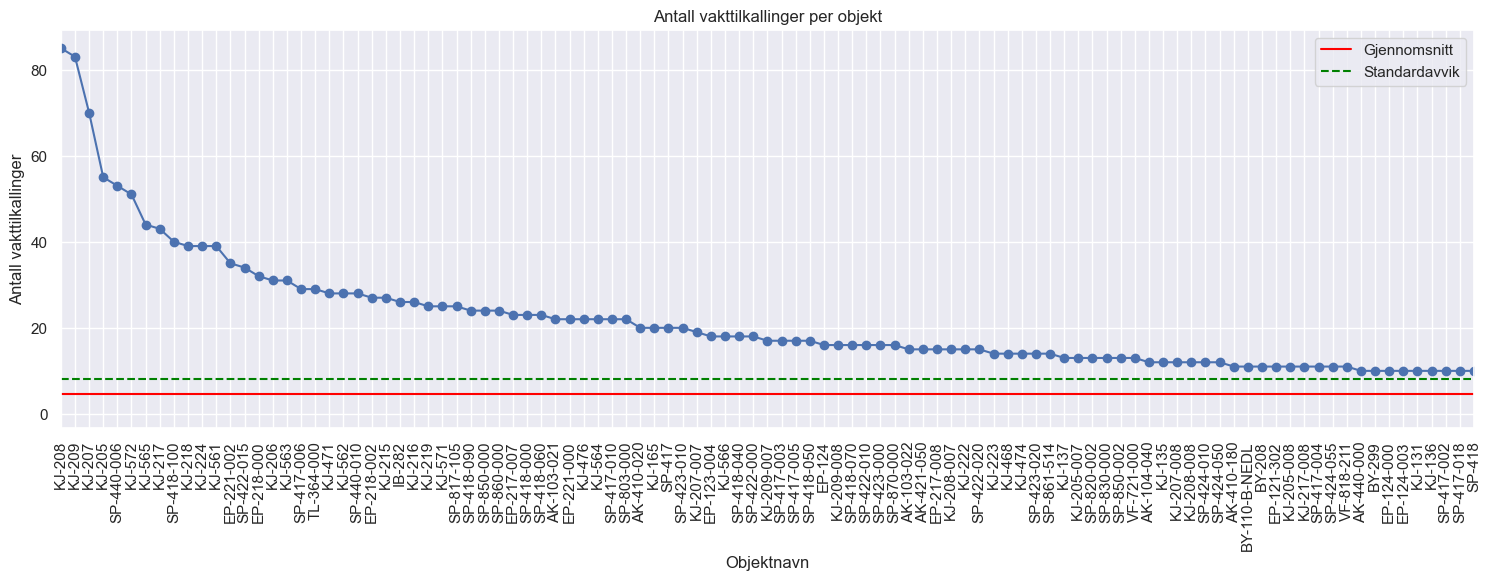

In [17]:
# Sorter objekter basert på deres vakttilkallinger (for bedre visualisering)
sorted_counts = sorted(antall_vakttilkallinger.items(), key=lambda x: x[1], reverse=True)
objektnavn = [item[0] for item in sorted_counts]
vakttilkallinger = [item[1] for item in sorted_counts]

# filtered_values = [value for value in vakttilkallinger if value > 4]
# mean = np.mean(filtered_values)
mean = np.mean(vakttilkallinger)
std = np.std(vakttilkallinger)

# Plotting
plt.figure(figsize=(15,6))
plt.plot(objektnavn, vakttilkallinger, marker='o', linestyle='-')
plt.axhline(mean, color='red', linestyle='-', label="Gjennomsnitt")
plt.axhline(std, color='green', linestyle='--', label="Standardavvik")
plt.xticks(rotation=90)  # Roter objektnavnene for bedre leselighet
plt.xlabel('Objektnavn')
plt.ylabel('Antall vakttilkallinger')
plt.title('Antall vakttilkallinger per objekt')
plt.legend()
plt.tight_layout()  # Sikrer at objektnavnene ikke overlapper

# Begrens antall objekter vist for klarhet
plt.xlim(0, 100)  # Dette vil vise de første 50 objektene, juster som nødvendig

plt.show()


# Visualisere med historgram

Diagrammet illustrerer fordelingen av antall vakttilkallinger per unikt Objektnr. Hver stolpe representerer et intervall av vakttilkallinger, mens stolpens høyde angir hvor mange Objektnr som har et vakttilkallingsantall innenfor det intervallet. Etikettene på stolpene indikerer det nøyaktige antallet Objektnr som passer inn i hvert intervall.

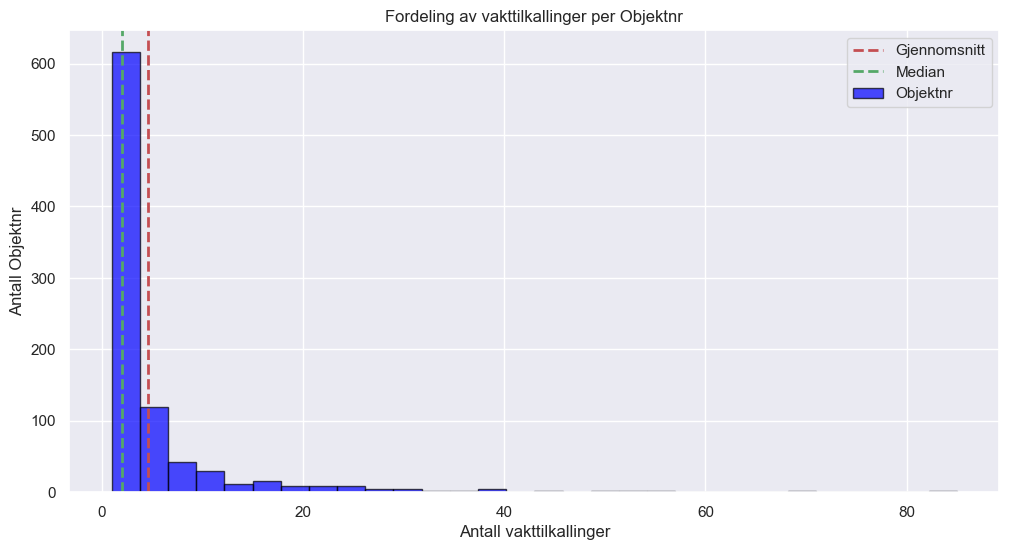

In [18]:
# her kan vi plotte basert på antall objekter

import matplotlib.pyplot as plt

# vakttilkallinger fra antall_vakttilkallinger 
values = list(antall_vakttilkallinger.values())

plt.figure(figsize=(12, 6))
plt.hist(values, bins=30, color='blue', edgecolor='black', alpha=0.7)

# Gjennomsnittslinje
mean_value = np.mean(values)
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2)

# Medianlinje
median_value = np.median(values)
plt.axvline(median_value, color='g', linestyle='dashed', linewidth=2)

# Titler og aksetitler
plt.title('Fordeling av vakttilkallinger per Objektnr')
plt.xlabel('Antall vakttilkallinger')
plt.ylabel('Antall Objektnr')
plt.legend(['Gjennomsnitt', 'Median', 'Objektnr'])
plt.show()

# Visualisere med boksdiagram graf

c:\Users\shahinos\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


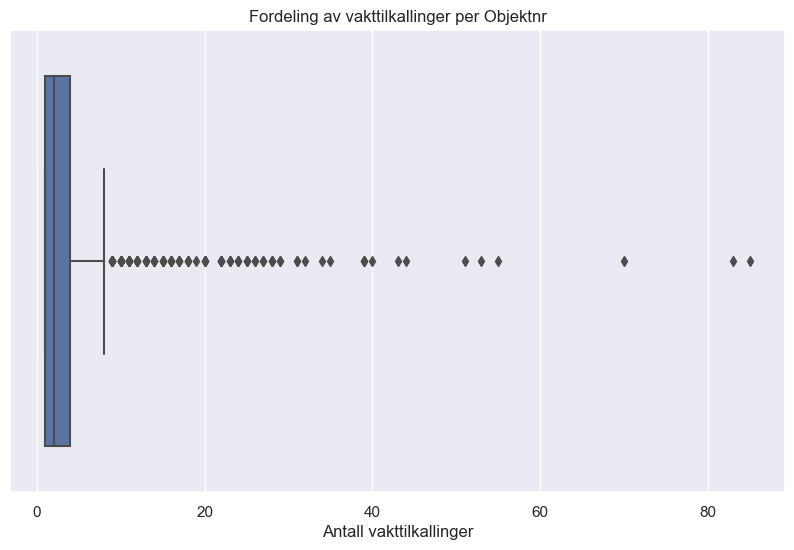

In [19]:
# Data

values = list(antall_vakttilkallinger.values())

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(values)
plt.title('Fordeling av vakttilkallinger per Objektnr')
plt.xlabel('Antall vakttilkallinger')
plt.show()

# Kumulativ distribusjonsfunksjon (CDF): 
En CDF-plot kan hjelpe med å vise sannsynligheten for at et tilfeldig valgt objekt vil ha et bestemt antall vakttilkallinger eller mindre. Dette gir innsikt i hvordan vakttilkallinger er fordelt over alle objekter.

Eksempel: 
- For verdien 1 på x-aksen (1 vakttilkalling), vil CDF-verdien være 0,25 (eller 25%). Dette betyr at 25% av objektene har 1 vakttilkalling eller mindre.
- For verdien 2 på x-aksen (2 vakttilkallinger), vil CDF-verdien være 0,50 (eller 50%). Dette betyr at 50% av objektene har 2 vakttilkallinger eller mindre.
- Og så videre...

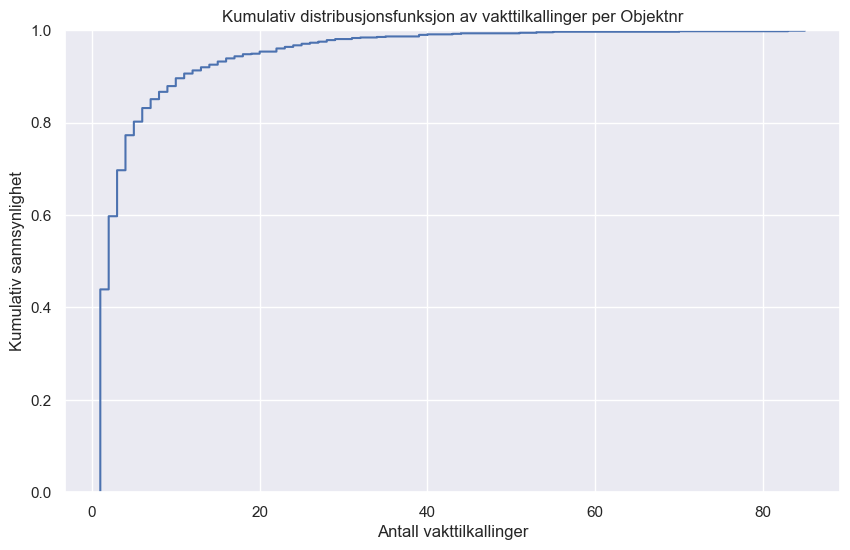

In [20]:


plt.figure(figsize=(10, 6))
sns.ecdfplot(values)
plt.title('Kumulativ distribusjonsfunksjon av vakttilkallinger per Objektnr')
plt.xlabel('Antall vakttilkallinger')
plt.ylabel('Kumulativ sannsynlighet')
plt.show()

# Spredningsdiagram

Vi har beregnet median absolutt avvik (MAD) og gjennomsnitt. Gjennomsnittet er på 4.65, mens MAD er på 1. 

Hva vil MAD på 1 si:
- En betydelig andel av dataene dine ligger nær medianen.
- Den "typiske" avviket fra medianen er 1.

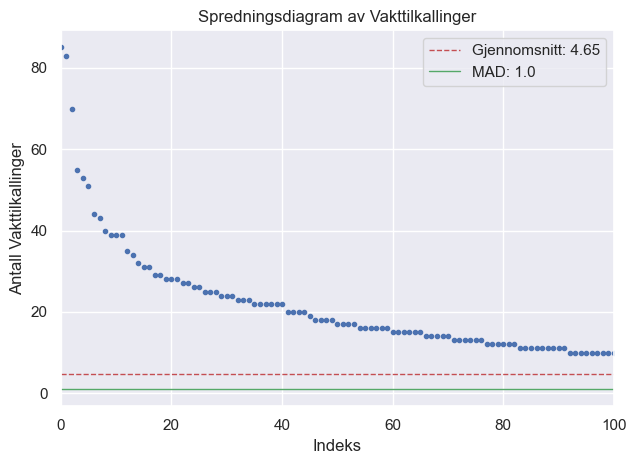

In [37]:
# Indeksene for hver verdi

# definerer en funksjon for å finne ut Median Absolutt Avvik
def mad(data):
    median = np.median(data)
    mad_value = np.median(np.abs(data - median))
    return mad_value


indexes = np.arange(len(values))

plt.scatter(indexes, vakttilkallinger, marker='.')
plt.title("Spredningsdiagram av Vakttilkallinger")
plt.xlabel("Indeks")
plt.ylabel("Antall Vakttilkallinger")
plt.axhline(np.mean(vakttilkallinger), color='r', linestyle='dashed', linewidth=1, label=f"Gjennomsnitt: {round(np.mean(vakttilkallinger), 2)}")
plt.axhline(mad(vakttilkallinger), color='g', linestyle='-', linewidth=1, label=f"MAD: {mad(vakttilkallinger)}")
plt.legend()
plt.tight_layout()
plt.xlim(0, 100)
plt.show()

# Gjennomsnitt og standardavvik

Standardavvik er et mål på spredningen i datasamlingen. STD viser gjennomsnittets avviket fra gjennomsnittet, med andre ord: vi regner ut gjennomsnittet først, så regner vi ut hvor langt hvert tall er fra gjennomsnittet(avvik), så tar vi regner vi gjennomsnittet av alle avvikene.  

In [22]:
# regne ut gjennomsnitt, stdavvik


mean = np.mean(vakt_til_kallinger_per_objekt)
std = np.std(vakt_til_kallinger_per_objekt)

print("Gjennomsnitt: ", mean)
print("Standardavvik: ", std)



Gjennomsnitt:  4.649321266968326
Standardavvik:  8.122178562873065


# Videre analyse av data

Fram til nå har vi sett på hvert enkelt objekt og dets hyppighet i vakttilkallinger. Vi har funnet store forskjeller på hvor mange tilkallinger hvert objekt har. Nå skal vi se på dataene med hensyn på tiden gjennom for alle tre årene. Vi skal også sammenligne forskjelliger ferioder for hvert objekt, og til slutt skal vi fokusere på periodene med hensyn på alle objektene. 

Spørsmålene vi skal stille oss er:

- Hvilket perioder har vært mest belastende for:
    - et enkelt objekt
    - for alle objektene
- Er det noen spesielle perioder som skiller seg ut?
- Hvilket trender kan vi dra ut av dataen?
- Viser noen av objektene forbedringer eller har det blitt verre?
- Hvor langt er det mellom innkallingene og hvor hyppige skjer de?
